In [10]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [19]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_other')
obj

An object of class Seurat 
56583 features across 37179 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [31]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_neuron') 
obj %>% `[[` %>% pull(labels) %>% unique %>% dput

structure(c(1L, 15L, 32L, 22L, 20L, 24L, 6L, 19L, 3L, 14L, 16L, 
26L, 7L, 33L, 31L, 9L, 18L, 11L, 29L, 12L, 28L, 13L, 27L, 2L, 
17L, 30L, 34L, 5L, 10L, 21L, 8L, 4L, 23L, 25L), .Label = c("Nr5a1_Bdnf", 
"Agrp", "Tmem215", "Rgs16_Nmu", "Htr3b", "Slc17a6_Fam19a2", "Pomc_Glipr1-Slc17a6_Trhr", 
"Sst_Unc13c-Agrp", "Nr5a1_Nfib", "Trh_Cxcl12", "Kisspeptin", 
"Trh_Lef1", "Pomc_Lepr", "Unassigned2", "Unassigned1", "Ghrh", 
"Slc17a6_Trhr", "Sst_Pthlh", "Nr5a1_Bdnf-Unassigned1", "Tbx19", 
"Nfix_Htr2c", "Gm8773_Tac1-Hdc", "Rgs16_Dlx1-Unassigned2", "Th_Nfib-Arx_Nr5a2", 
"Rgs16_Dlx1", "Nr5a1_Bdnf-Nr5a1_Nfib", "Th_Slc6a3", "Sst_Nts", 
"Gpr50", "Qrfp", "Unassigned2-Unassigned1", "Sst_Pthlh-Ghrh", 
"Oxt-Unassigned1", "Unassigned2-Rgs16_Vip"), class = "factor")


In [15]:
splitwrapper <- function(seur, split.by = "predicted.id") {
  
  future::plan(future::sequential)
  Seurat::DefaultAssay(seur) <- "SCT"
  split <- Seurat::SplitObject(seur, split.by = split.by)
  return(split)

}


In [22]:
single_split = function(obj, label) {
    obj = subset(x = obj, subset = labels == label)
    obj
}

In [24]:
single_split(obj, 'Astrocytes')@meta.data %>% pull(labels) %>% unique

[1] Astrocytes
17 Levels: Astrocytes a1_Tany-Astrocytes MOL a2_Tanycytes ... MOL-a2_Tanycytes

In [28]:
obj %>% `[[`

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO
CCTATCGAGCCATTCA_1_1 SI-TT-A11  49695      7017         SI-TT-A11 1473      
GTCCTCAAGCGAGGAG_1_1 SI-TT-A11  41375      6414         SI-TT-A11 2757      
AAGGTAATCTGAGGCC_1_1 SI-TT-A11  40000      6407         SI-TT-A11 1678      
TCCGTGTCACCTGTCT_1_1 SI-TT-A11  39270      6913         SI-TT-A11 1516      
ATGGTTGGTCGATTCA_1_1 SI-TT-A11  38974      6546         SI-TT-A11 1582      
CTTCGGTTCAGCTGAT_1_1 SI-TT-A11  40118      5968         SI-TT-A11 2558      
AGTACTGGTGATACTC_1_1 SI-TT-A11  39245      6393         SI-TT-A11 1839      
GATCATGCATAGAATG_1_1 SI-TT-A11  36650      6219         SI-TT-A11 1780      
ATTACTCAGCGATCGA_1_1 SI-TT-A11  34853      6496         SI-TT-A11 1740      
TCTAACTCAATCTCGA_1_1 SI-TT-A11  35178      6131         SI-TT-A11 1966      
GGAGATGGTCTTCAAG_1_1 SI-TT-A11  31712      5885         SI-TT-A11 2135      
AATTTCCAGGAAGTAG_1_1 SI-TT-A11  34219      6093         SI-TT-A11 1951      
AATGACCCACAGAAGC_1_1 SI-TT-A11  28771      6022         SI-TT-A11 1698      
TACCGAACACTGGCGT_1_1 SI-TT-A11  28221      5706         SI-TT-A11 1828      
ACAACCACAACTTGCA_1_1 SI-TT-A11  26805      5234         SI-TT-A11 1235      
ACCGTTCCAAGGTACG_1_1 SI-TT-A11  28184      5236         SI-TT-A11 2074      
GTTACCCTCCACATAG_1_1 SI-TT-A11  26567      5451         SI-TT-A11 1796      
TTTATGCTCAAATAGG_1_1 SI-TT-A11  27552      5377         SI-TT-A11 1692      
TAATCTCTCTCCTGCA_1_1 SI-TT-A11  26807      5343         SI-TT-A11  912      
CAGCAATCAGCATGCC_1_1 SI-TT-A11  22701      5390         SI-TT-A11 1055      
TTAGTCTAGGACTATA_1_1 SI-TT-A11  23507      5294         SI-TT-A11 1421      
TAAGTCGCATGACTCA_1_1 SI-TT-A11  24078      4829         SI-TT-A11 1639      
ATTACTCTCCGCGGAT_1_1 SI-TT-A11  22867      4243         SI-TT-A11 1808      
AGCCACGAGGTTCACT_1_1 SI-TT-A11  21712      4294         SI-TT-A11 1723      
GTTGTCCCATCGGCCA_1_1 SI-TT-A11  21393      4603         SI-TT-A11 1728      
CGCAGGTTCCATAAGC_1_1 SI-TT-A11  21549      5210         SI-TT-A11 1759      
AACCAACTCCATGCAA_1_1 SI-TT-A11  21345      5067         SI-TT-A11 1192      
GAACACTAGAAATCCA_1_1 SI-TT-A11  21472      4513         SI-TT-A11 1540      
GGTCTGGCAGCTCCTT_1_1 SI-TT-A11  21647      4381         SI-TT-A11 1902      
CTCGAGGCAGTCTGGC_1_1 SI-TT-A11  21926      4349         SI-TT-A11 1482      
⋮                    ⋮          ⋮          ⋮            ⋮         ⋮         
AGCGTATGTGGCTACC_5_3 SI-TT-H11  6079       2709         SI-TT-H11  818      
TCACGCTGTCAGTTTG_5_3 SI-TT-H11  5741       2539         SI-TT-H11  952      
ATGCCTCCATTGACTG_5_3 SI-TT-H11  5950       2170         SI-TT-H11  989      
CTCCCTCCAAGTATAG_5_3 SI-TT-H11  5445       2344         SI-TT-H11  743      
GATCACACATTGACAC_5_3 SI-TT-H11  5949       2215         SI-TT-H11  948      
AGGAATATCCACTGAA_5_3 SI-TT-H11  5837       2053         SI-TT-H11  758      
TCTCAGCGTGGATCGA_5_3 SI-TT-H11  6186       2142         SI-TT-H11  708      
ATTGGGTAGCAGTACG_5_3 SI-TT-H11  6194       2514         SI-TT-H11  952      
TCGATTTCAACACGTT_5_3 SI-TT-H11  6220       2714         SI-TT-H11  866      
AGTACTGAGGCATCTT_5_3 SI-TT-H11  5950       2594         SI-TT-H11  854      
AGGACTTGTGGATCGA_5_3 SI-TT-H11  5649       1971         SI-TT-H11  848      
CATGCCTTCCAAGGGA_5_3 SI-TT-H11  6103       2208         SI-TT-H11  949      
TGTTCTAGTGTCCGTG_5_3 SI-TT-H11  5479       2241         SI-TT-H11  934      
CGTTGGGCACTCCCTA_5_3 SI-TT-H11  6024       2157         SI-TT-H11  769      
CGTTAGACATTCTTCA_5_3 SI-TT-H11  5472       2099         SI-TT-H11  876      
AAAGGTACAGGTCAAG_5_3 SI-TT-H11  6321       2734         SI-TT-H11  826      
CAACCAAAGAGGTATT_5_3 SI-TT-H11  5401       2489         SI-TT-H11 1014      
GTTGCGGCATCCAACA_5_3 SI-TT-H11  5982       2698         SI-TT-H11  931      
ATTCCTATCACTTGTT_5_3 SI-TT-H11  6524       2579         SI-TT-H11  739      
CGAGTTAAGGCTGGAT_5_3 SI-TT-H11  6348       2368         SI-TT-H11  763      
TTGGATGGTACTGTTG_

In [ ]:
obj@

In [12]:
obj <- obj[, sample(colnames(obj), size = 10000, replace=F)]

In [13]:
obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))

In [424]:
obj@meta.data$time = forcats::fct_recode(obj@meta.data$time, "T1"="Day5", "T2"="Day14")

In [427]:
obj@meta.data$treatment = forcats::fct_recode(obj@meta.data$treatment, "P0"="Veh_PF", "P1"="FGF1")

In [430]:
obj@meta.data$strain = forcats::fct_recode(obj@meta.data$strain, "S0"="BL6", "S1"="obob")

In [431]:
levels(obj@meta.data$strain)

[1] "S0" "S1"

In [434]:
colnames(obj@meta.data)

[1] "orig.ident"                    "nCount_RNA"                    "nFeature_RNA"                 
 [4] "Index.10x"                     "nCount_HTO"                    "nFeature_HTO"                 
 [7] "Index.HTO"                     "nCount_spliced"                "nFeature_spliced"             
[10] "nCount_unspliced"              "nFeature_unspliced"            "HTO_mcl_maxID"                
[13] "HTO_mcl_secondID"              "HTO_mcl_margin"                "HTO_mcl_classification"       
[16] "HTO_mcl_classification.global" "hash.mcl.ID"                   "doublet"                      
[19] "predicted_dub_std"             "predicted_dub_cut"             "predicted_dub_all"            
[22] "nCount_SCT"                    "nFeature_SCT"                  "SCT_snn_res.0.8"              
[25] "seurat_clusters"               "strain"                        "treatment"                    
[28] "time"                          "collection_date"               "isolation_date"               
[31] "batch"                         "predicted.id"                  "prediction.score.max"         
[34] "labels"                        "group"

In [438]:
seq(1:length(levels(obj@meta.data$labels)))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

In [14]:
obj@meta.data$group = interaction(obj@meta.data$treatment, obj@meta.data$time, obj@meta.data$strain, drop = TRUE)

In [433]:
obj@meta.data$group %>% unique()

[1] P1.T2.S1 P1.T1.S1 P0.T2.S1 P0.T1.S0 P0.T2.S0 P0.T1.S1
Levels: P0.T2.S0 P0.T1.S0 P1.T2.S1 P0.T2.S1 P1.T1.S1 P0.T1.S1

In [4]:
obj@meta.data[obj@meta.data$group == 'FGF1.Day14.BL6',]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO
     Index.HTO nCount_spliced nFeature_spliced nCount_unspliced ⋯ strain
     treatment time collection_date isolation_date batch predicted.id
     prediction.score.max labels group

In [5]:
levels(obj@meta.data$group)

[1] "Veh_PF.Day14.BL6"  "Veh_PF.Day5.BL6"   "FGF1.Day14.obob"  
[4] "Veh_PF.Day14.obob" "FGF1.Day5.obob"    "Veh_PF.Day5.obob"

In [6]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 24262 37179 
metadata(0):
assays(2): counts logcounts
rownames(24262): Lypla1 Tcea1 ... Olfr187 ENSMUSG00000100896
rowData names(0):
colnames(37179): CCTATCGAGCCATTCA_1_1 GTCCTCAAGCGAGGAG_1_1 ...
  TTAATCCGTGATAGTA_5_3 TCACTCGAGGATACCG_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [7]:
# reducedDim(sce, "PCA", withDimnames=TRUE) <- obj[['pca']]@cell.embeddings

In [8]:
# sce <- runUMAP(sce, dimred='PCA', name = 'UMAP', n_dimred = 30)

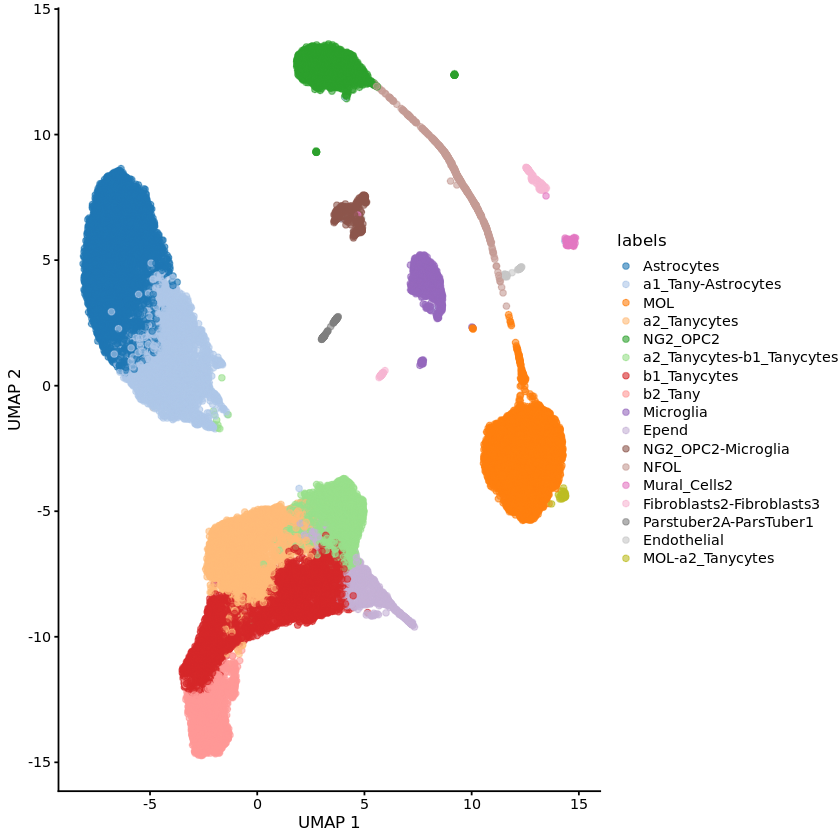

In [9]:
plotReducedDim(sce, colour_by = 'labels', dimred='UMAP')

In [10]:
obob_milo <- Milo(sce)

#build KNN graph
obob_milo <- buildGraph(obob_milo, k=40, d=30, reduced.dim = 'PCA')

#define neighbourhoods
obob_milo <- makeNhoods(obob_milo, prop = 0.1, k= 40, d=30, refined = T, reduced_dims = 'PCA')

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim



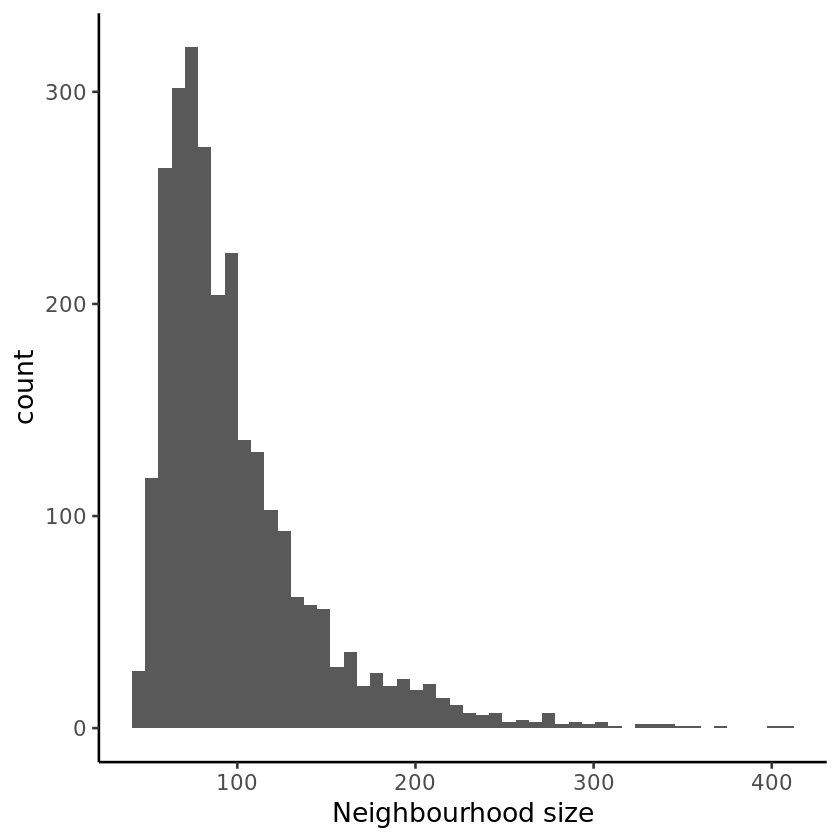

In [11]:
#plot neighbourhood sizes to check if we used appropriate k for graph building
  #we want to have an average size over 5 x N_samples
  #we have 171 samples - but not all samples will be in all neighbourhoods because of age variance
plotNhoodSizeHist(obob_milo)

Checking meta.data validity

Counting cells in neighbourhoods



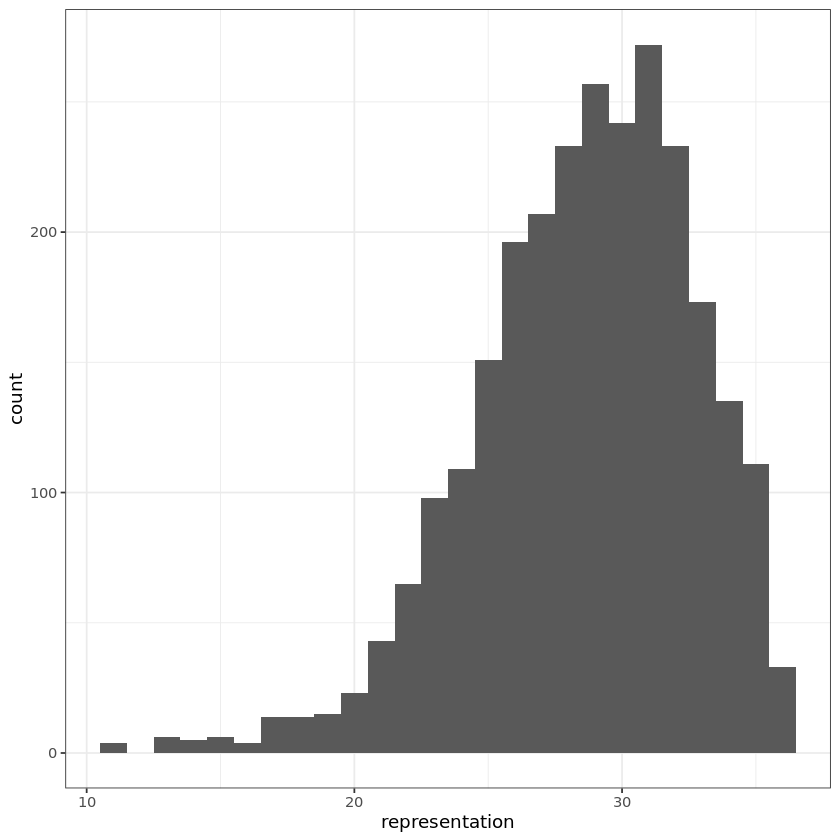

In [12]:
#add a n x m matrix to the milo object with number of neighbourhodds and samples
obob_milo <- countCells(obob_milo, meta.data = as.data.frame(colData(obob_milo)), sample = 'hash.mcl.ID')

#calculate sample representation in each neighbourhood
cell_counts <- as.data.frame(nhoodCounts(obob_milo)) %>% mutate(representation = rowSums(.>0))

#view distribution of N_samples in each neigbourhood
ggplot(cell_counts, aes(x = representation)) + 
  geom_histogram(binwidth = 1) + theme_bw()

#most neighbourhoods have 30-60 samples in them

In [13]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch', "strain")]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group            batch    strain
M13 M13         FGF1.Day14.obob  Batch__1 obob  
N7  N7          FGF1.Day5.obob   Batch__1 obob  
J11 J11         FGF1.Day14.obob  Batch__1 obob  
M4  M4          Veh_PF.Day5.BL6  Batch__1 BL6   
M18 M18         Veh_PF.Day14.BL6 Batch__1 BL6   
M17 M17         Veh_PF.Day14.BL6 Batch__1 BL6

In [14]:
levels(obob_design$group)

[1] "Veh_PF.Day14.BL6"  "Veh_PF.Day5.BL6"   "FGF1.Day14.obob"  
[4] "Veh_PF.Day14.obob" "FGF1.Day5.obob"    "Veh_PF.Day5.obob"

In [15]:
print(obob_design)

    hash.mcl.ID             group    batch strain
M13         M13   FGF1.Day14.obob Batch__1   obob
N7           N7    FGF1.Day5.obob Batch__1   obob
J11         J11   FGF1.Day14.obob Batch__1   obob
M4           M4   Veh_PF.Day5.BL6 Batch__1    BL6
M18         M18  Veh_PF.Day14.BL6 Batch__1    BL6
M17         M17  Veh_PF.Day14.BL6 Batch__1    BL6
M8           M8  Veh_PF.Day5.obob Batch__1   obob
J2           J2 Veh_PF.Day14.obob Batch__1   obob
M2           M2   Veh_PF.Day5.BL6 Batch__1    BL6
M24         M24 Veh_PF.Day14.obob Batch__1   obob
N8           N8  Veh_PF.Day5.obob Batch__1   obob
M9           M9    FGF1.Day5.obob Batch__1   obob
N17         N17    FGF1.Day5.obob Batch__2   obob
M10         M10    FGF1.Day5.obob Batch__2   obob
M11         M11  Veh_PF.Day5.obob Batch__2   obob
M23         M23   FGF1.Day14.obob Batch__2   obob
M25         M25 Veh_PF.Day14.obob Batch__2   obob
J16         J16   FGF1.Day14.obob Batch__2   obob
M29         M29 Veh_PF.Day14.obob Batch__2   obob


In [16]:
length(unique(obob_design$group))

[1] 6

In [17]:
dput(unique(obob_design$group))

structure(c(3L, 5L, 2L, 1L, 6L, 4L), .Label = c("Veh_PF.Day14.BL6", 
"Veh_PF.Day5.BL6", "FGF1.Day14.obob", "Veh_PF.Day14.obob", "FGF1.Day5.obob", 
"Veh_PF.Day5.obob"), class = "factor")


In [18]:
# store distances to nearest neighbours
# obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
# qs::qsave(obob_milo, 'obob_milo_other_all.qs')
obob_milo = qs::qread('obob_milo_other_all.qs')

In [69]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group + batch, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob groupVeh_PF.Day5.obob batchBatch__2 batchBatch__3
M13 0                     0                    1                    0                      0                   0                     0             0            
N7  0                     0                    0                    0                      1                   0                     0             0            
J11 0                     0                    1                    0                      0                   0                     0             0            
M4  0                     1                    0                    0                      0                   0                     0             0            
M18 1                     0                    0                    0                      0                   0                     0             0            
M17 1                     0                    0                    0                      0                   0                     0             0

In [70]:
options(width=120) 
print(model)

    groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M13                     0                    0                    1                      0                   0
N7                      0                    0                    0                      0                   1
J11                     0                    0                    1                      0                   0
M4                      0                    1                    0                      0                   0
M18                     1                    0                    0                      0                   0
M17                     1                    0                    0                      0                   0
M8                      0                    0                    0                      0                   0
J2                      0                    0                    0                      1                   0
M

In [71]:
print(mod.contrast)

                        Contrasts
Levels                   groupFGF1.Day5.obob-groupVeh_PF.Day5.obob
  groupVeh_PF.Day14.BL6                                          0
  groupVeh_PF.Day5.BL6                                           0
  groupFGF1.Day14.obob                                           0
  groupVeh_PF.Day14.obob                                         0
  groupFGF1.Day5.obob                                            1
  groupVeh_PF.Day5.obob                                         -1
  batchBatch__2                                                  0
  batchBatch__3                                                  0


In [260]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, 
#                          model.contrasts = c("((groupVeh_PF.Day5.obob+groupVeh_PF.Day14.obob)/2) - ((groupVeh_PF.Day5.BL6+groupVeh_PF.Day14.BL6)/2)"))
                         model.contrasts = c("groupFGF1.Day5.obob - groupVeh_PF.Day5.obob"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



logFC    logCPM   F        PValue       FDR          Nhood SpatialFDR  
332  5.552183 9.222510 47.73220 7.118677e-12 1.885738e-08  332  4.229734e-08
204  6.319601 9.099482 45.99951 1.681257e-11 2.226825e-08  204  5.090329e-08
171  5.426360 9.181579 44.51609 3.504584e-11 3.094547e-08  171  7.008348e-08
2642 5.361570 9.145646 42.54576 9.330790e-11 6.179316e-08 2642  1.411666e-07
102  5.317752 9.098756 40.70874 2.329564e-10 1.234203e-07  102  2.828238e-07
1992 4.408229 9.259332 38.39894 7.381032e-10 3.258726e-07 1992  7.393488e-07


FALSE  TRUE 
 2291   358 

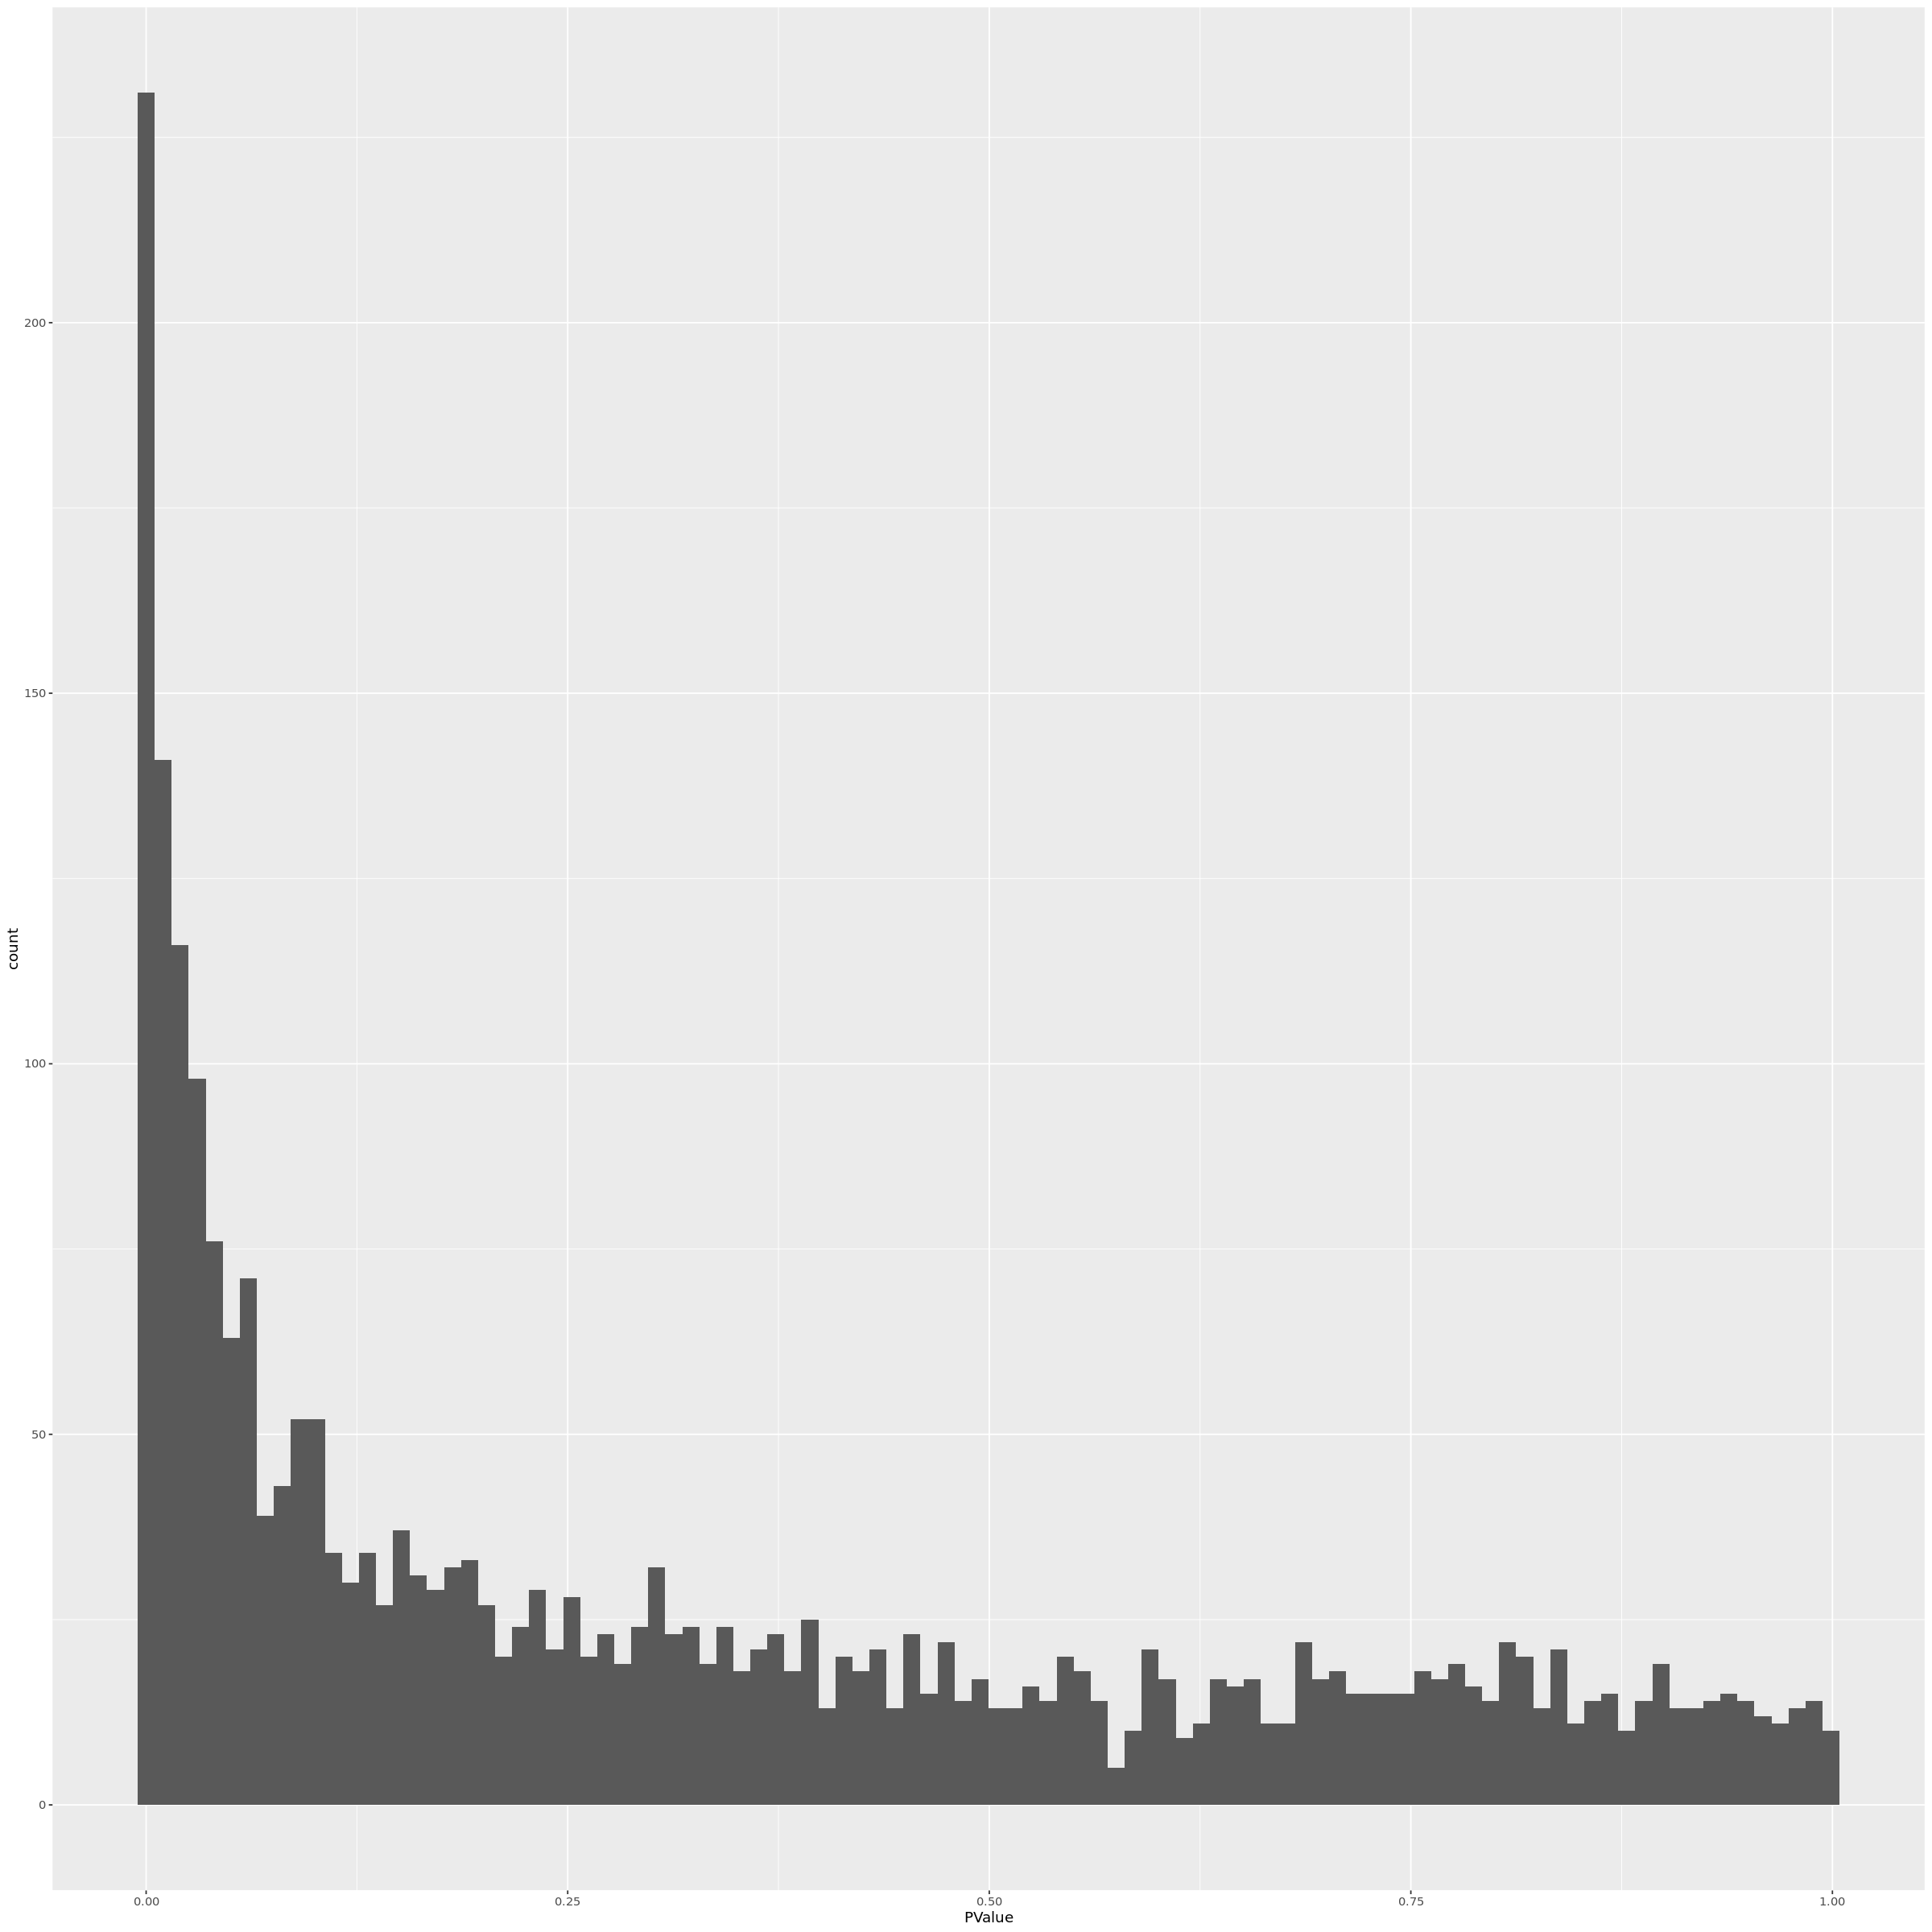

In [261]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

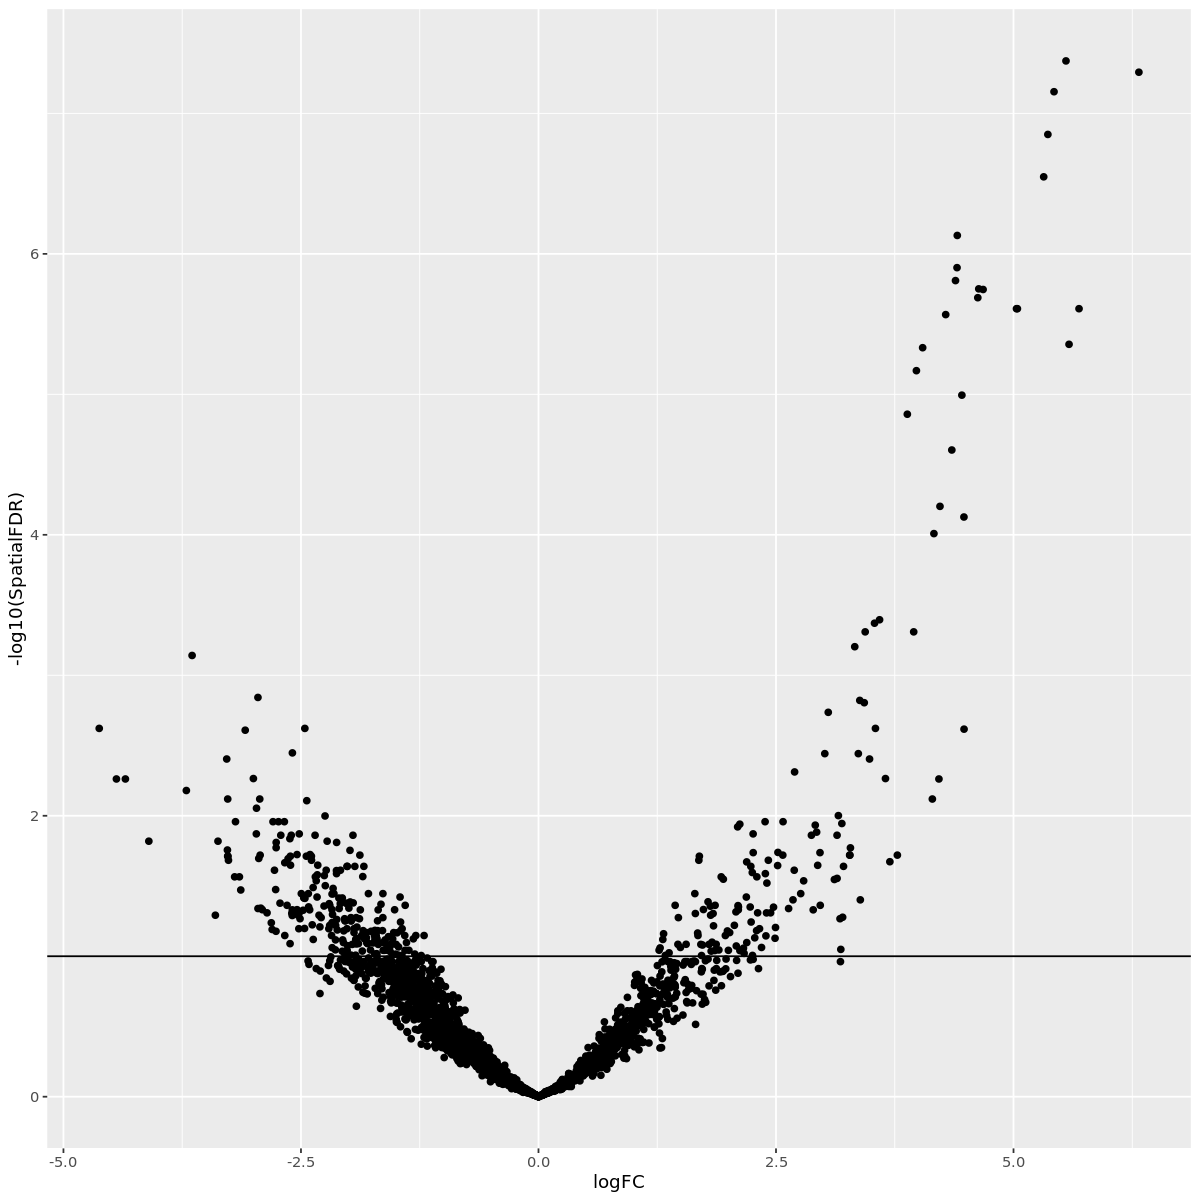

In [262]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [263]:
obob_milo <- buildNhoodGraph(obob_milo)

In [264]:
head(data.frame(colData(obob_milo)))

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO Index.HTO nCount_spliced
CCTATCGAGCCATTCA_1_1 SI-TT-A11  49695      7017         SI-TT-A11 1473       12           D706      7105          
GTCCTCAAGCGAGGAG_1_1 SI-TT-A11  41375      6414         SI-TT-A11 2757       12           D706      6392          
AAGGTAATCTGAGGCC_1_1 SI-TT-A11  40000      6407         SI-TT-A11 1678       12           D706      5088          
TCCGTGTCACCTGTCT_1_1 SI-TT-A11  39270      6913         SI-TT-A11 1516       12           D706      6058          
ATGGTTGGTCGATTCA_1_1 SI-TT-A11  38974      6546         SI-TT-A11 1582       12           D706      5709          
CTTCGGTTCAGCTGAT_1_1 SI-TT-A11  40118      5968         SI-TT-A11 2558       12           D706      7081          
                     nFeature_spliced nCount_unspliced ⋯ treatment time  collection_date isolation_date batch   
CCTATCGAGCCATTCA_1_1 3206             42590            ⋯ FGF1      Day14 220407          22/6/2022      Batch__1
GTCCTCAAGCGAGGAG_1_1 2838             34983            ⋯ FGF1      Day5  211213          22/6/2022      Batch__1
AAGGTAATCTGAGGCC_1_1 2532             34912            ⋯ FGF1      Day14 220131          22/6/2022      Batch__1
TCCGTGTCACCTGTCT_1_1 2883             33212            ⋯ FGF1      Day14 220407          22/6/2022      Batch__1
ATGGTTGGTCGATTCA_1_1 2734             33265            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
CTTCGGTTCAGCTGAT_1_1 2634             33037            ⋯ FGF1      Day5  211213          22/6/2022      Batch__1
                     predicted.id prediction.score.max labels             group           ident
CCTATCGAGCCATTCA_1_1 NG2_OPC2     0.3917772            NG2_OPC2-Microglia FGF1.Day14.obob 12   
GTCCTCAAGCGAGGAG_1_1 NFOL         1.0000000            NFOL               FGF1.Day5.obob  13   
AAGGTAATCTGAGGCC_1_1 NG2_OPC2     0.9625983            NG2_OPC2-Microglia FGF1.Day14.obob 12   
TCCGTGTCACCTGTCT_1_1 Parstuber2A  0.2406799            NG2_OPC2-Microglia FGF1.Day14.obob 12   
ATGGTTGGTCGATTCA_1_1 NG2_OPC2     0.5186747            NG2_OPC2-Microglia Veh_PF.Day5.BL6 12   
CTTCGGTTCAGCTGAT_1_1 NFOL         0.9833581            NFOL               FGF1.Day5.obob  13

In [265]:
options(repr.plot.width=10, repr.plot.height=10)
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="labels", text_by = "labels", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none") 

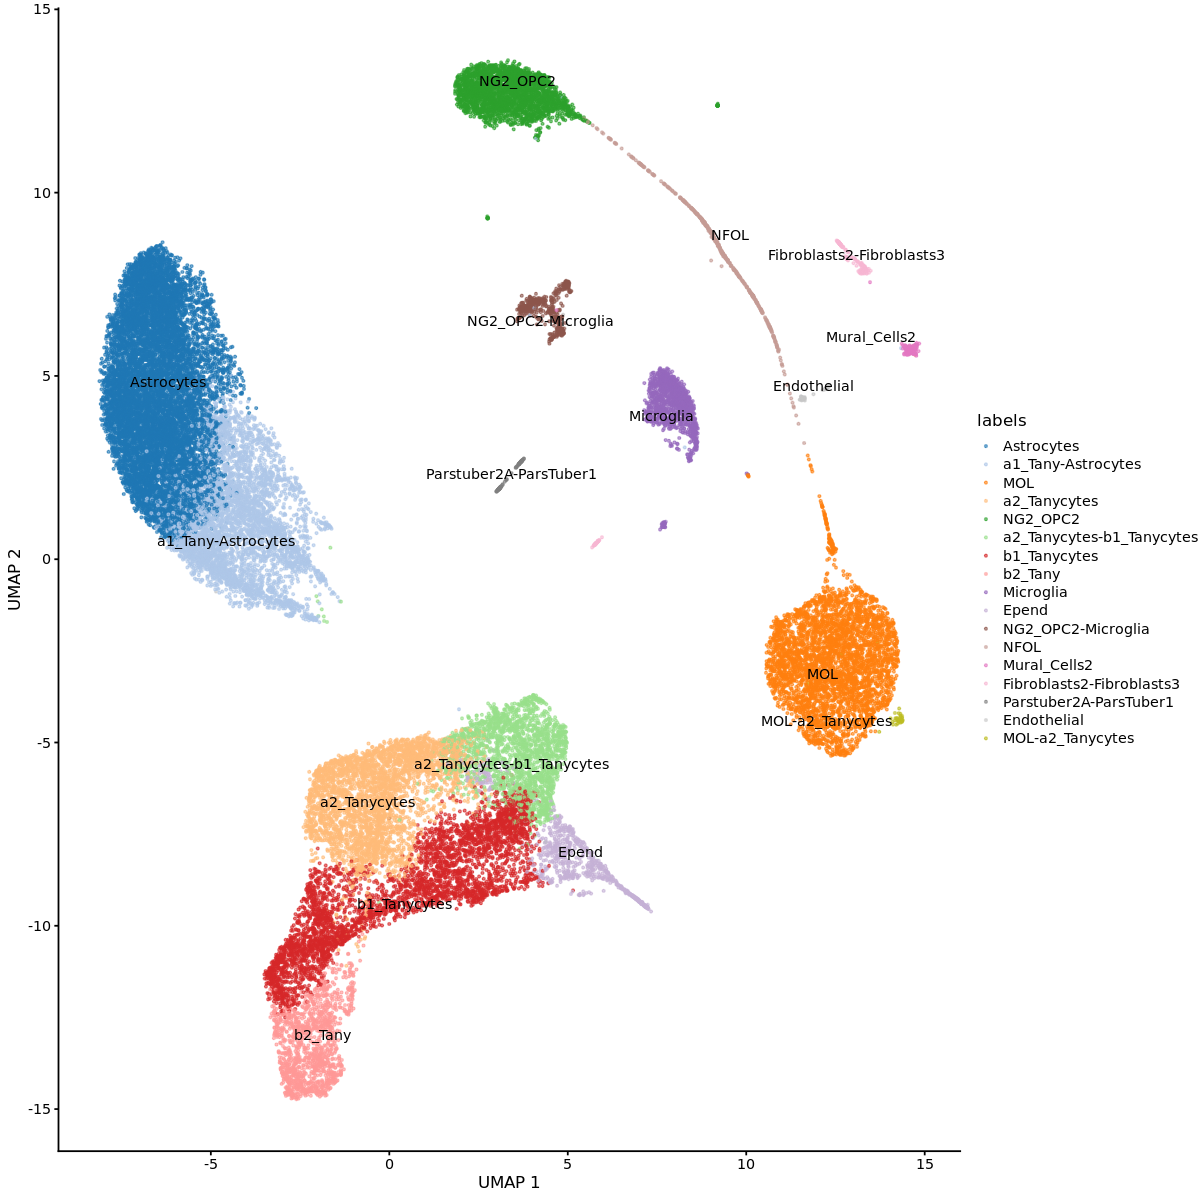

In [266]:
umap_pl

In [267]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plot = DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE) + NoLegend()
umap_plot

In [268]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

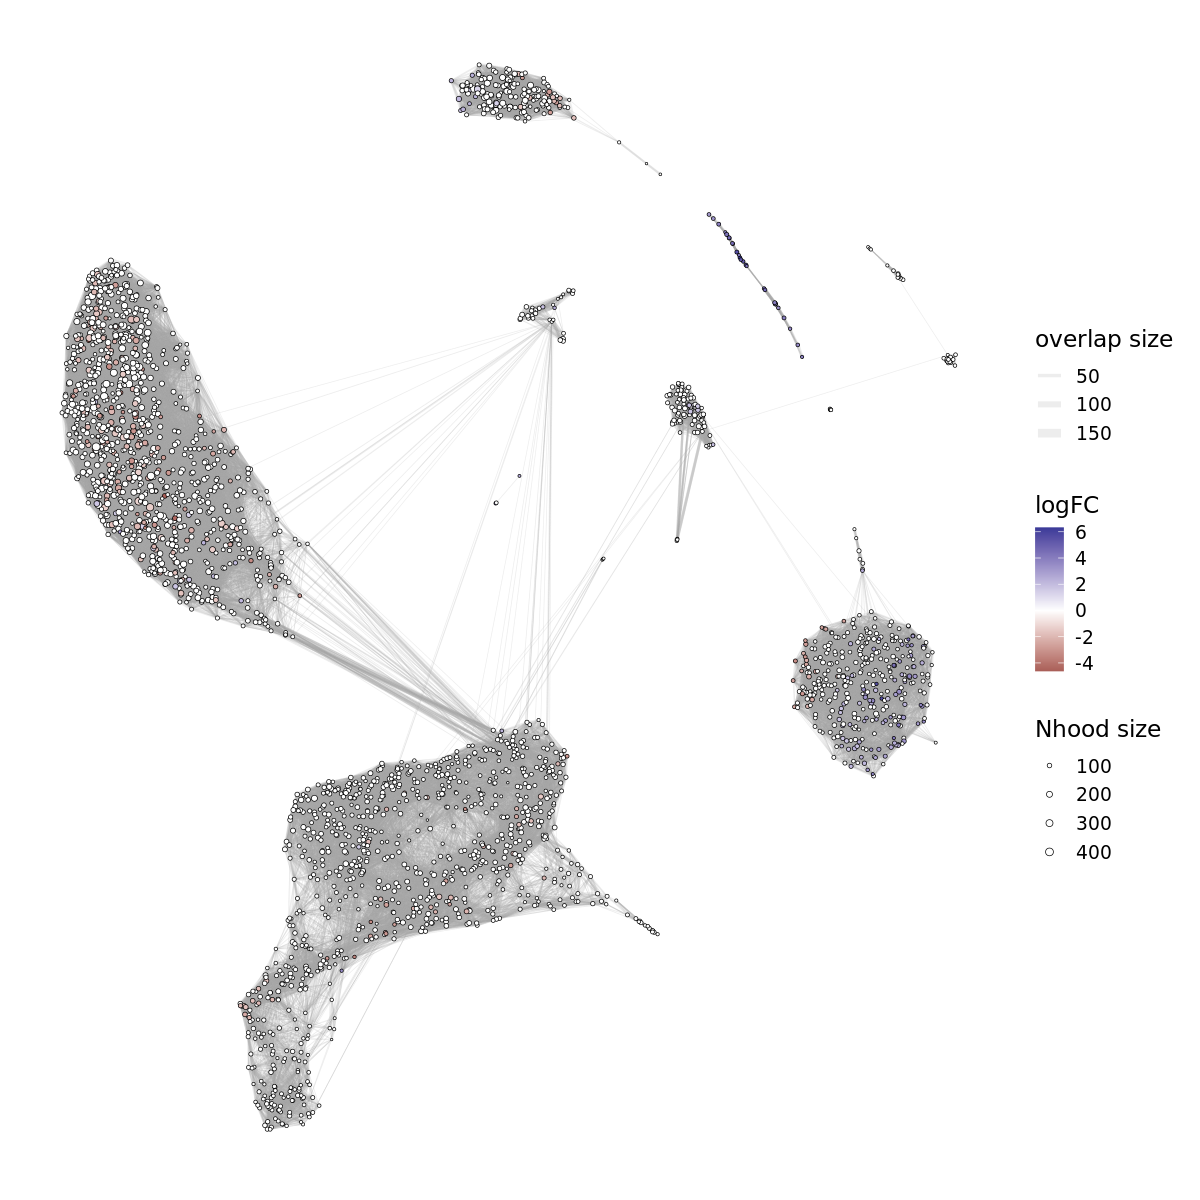

In [269]:
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2), ) 

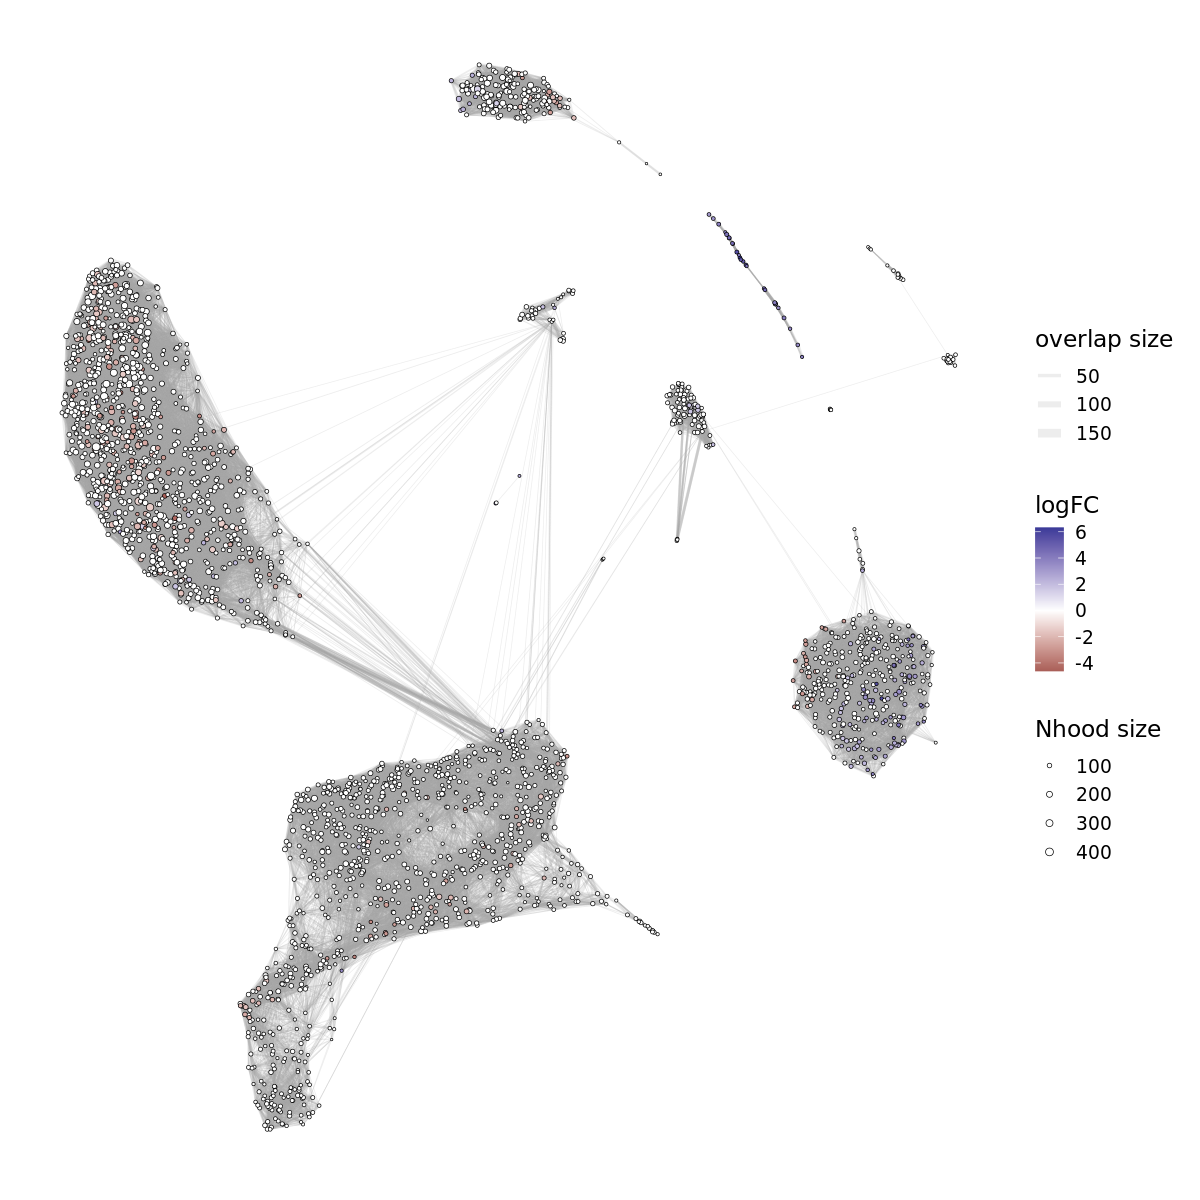

In [270]:
options(repr.plot.width=10, repr.plot.height=10)
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

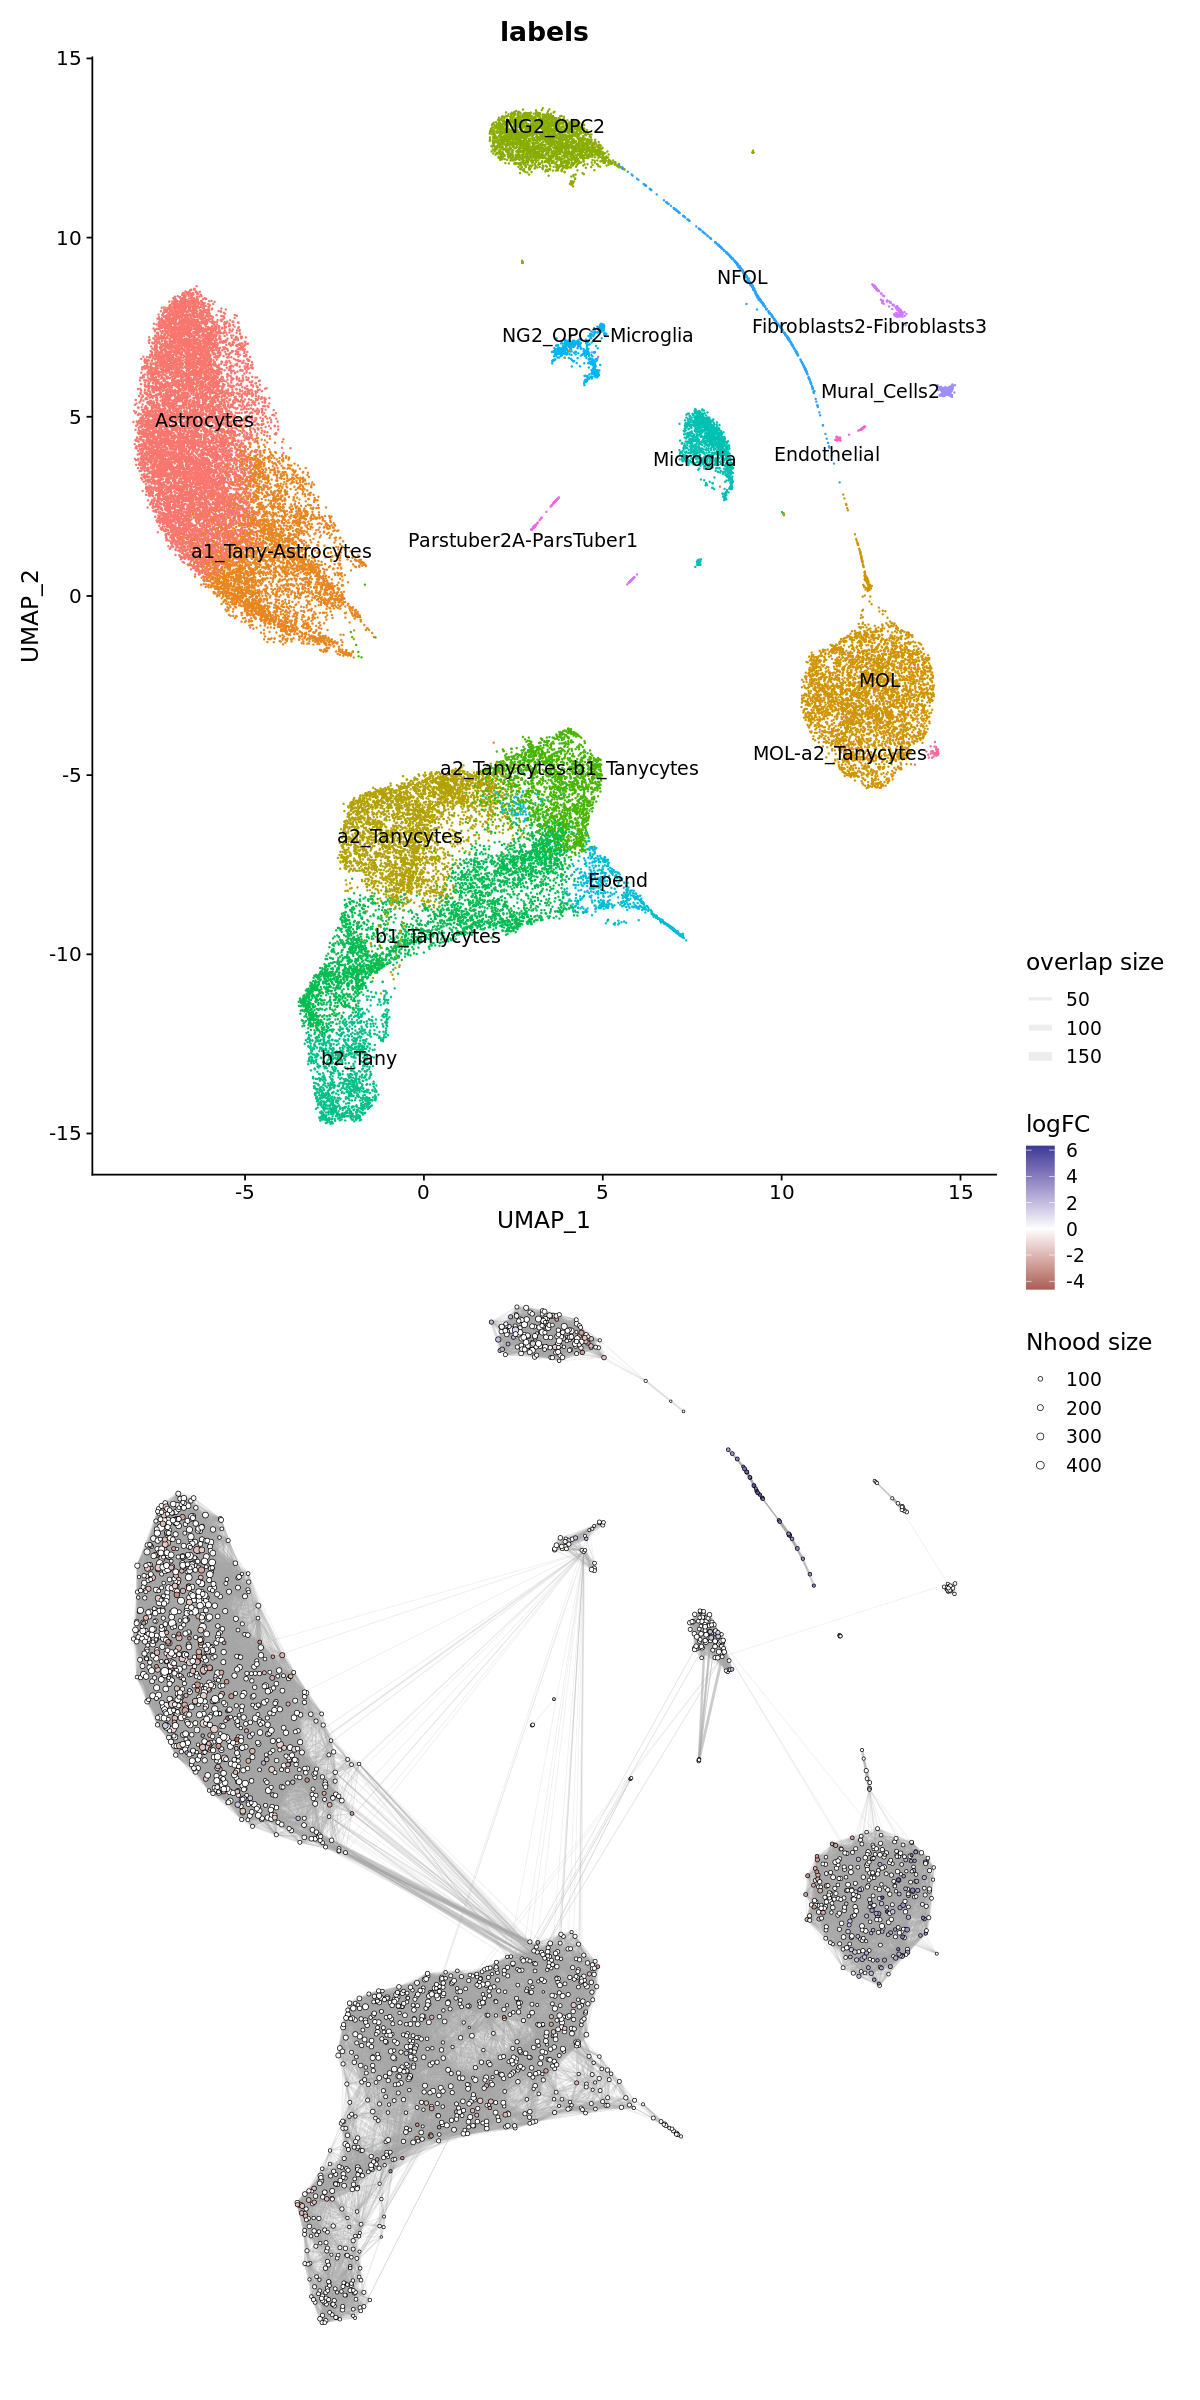

In [271]:
options(repr.plot.width=10, repr.plot.height=20)
umap_plot / nh_graph_pl +
  plot_layout(guides="collect")

In [272]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "labels")
head(da_results)

logFC      logCPM    F         PValue      FDR        Nhood SpatialFDR labels             labels_fraction
1  0.7334450  8.982463 0.7926651 0.373446434 0.58889652 1     0.56431251 MOL                1.0000000      
2 -1.4569833 10.422220 9.2665469 0.002373109 0.03880473 2     0.03791721 a1_Tany-Astrocytes 0.9965035      
3  0.2240856  9.133370 0.1195876 0.729529240 0.86074256 3     0.84616414 b1_Tanycytes       0.8333333      
4  1.8589716  9.315251 8.7482634 0.003145968 0.04569501 4     0.04342121 MOL                1.0000000      
5 -1.4030128 10.633093 8.7559590 0.003132796 0.04569501 5     0.04342121 Astrocytes         0.8101983      
6 -2.4084376  9.065168 8.3707644 0.003866611 0.04972161 6     0.04676026 MOL                1.0000000

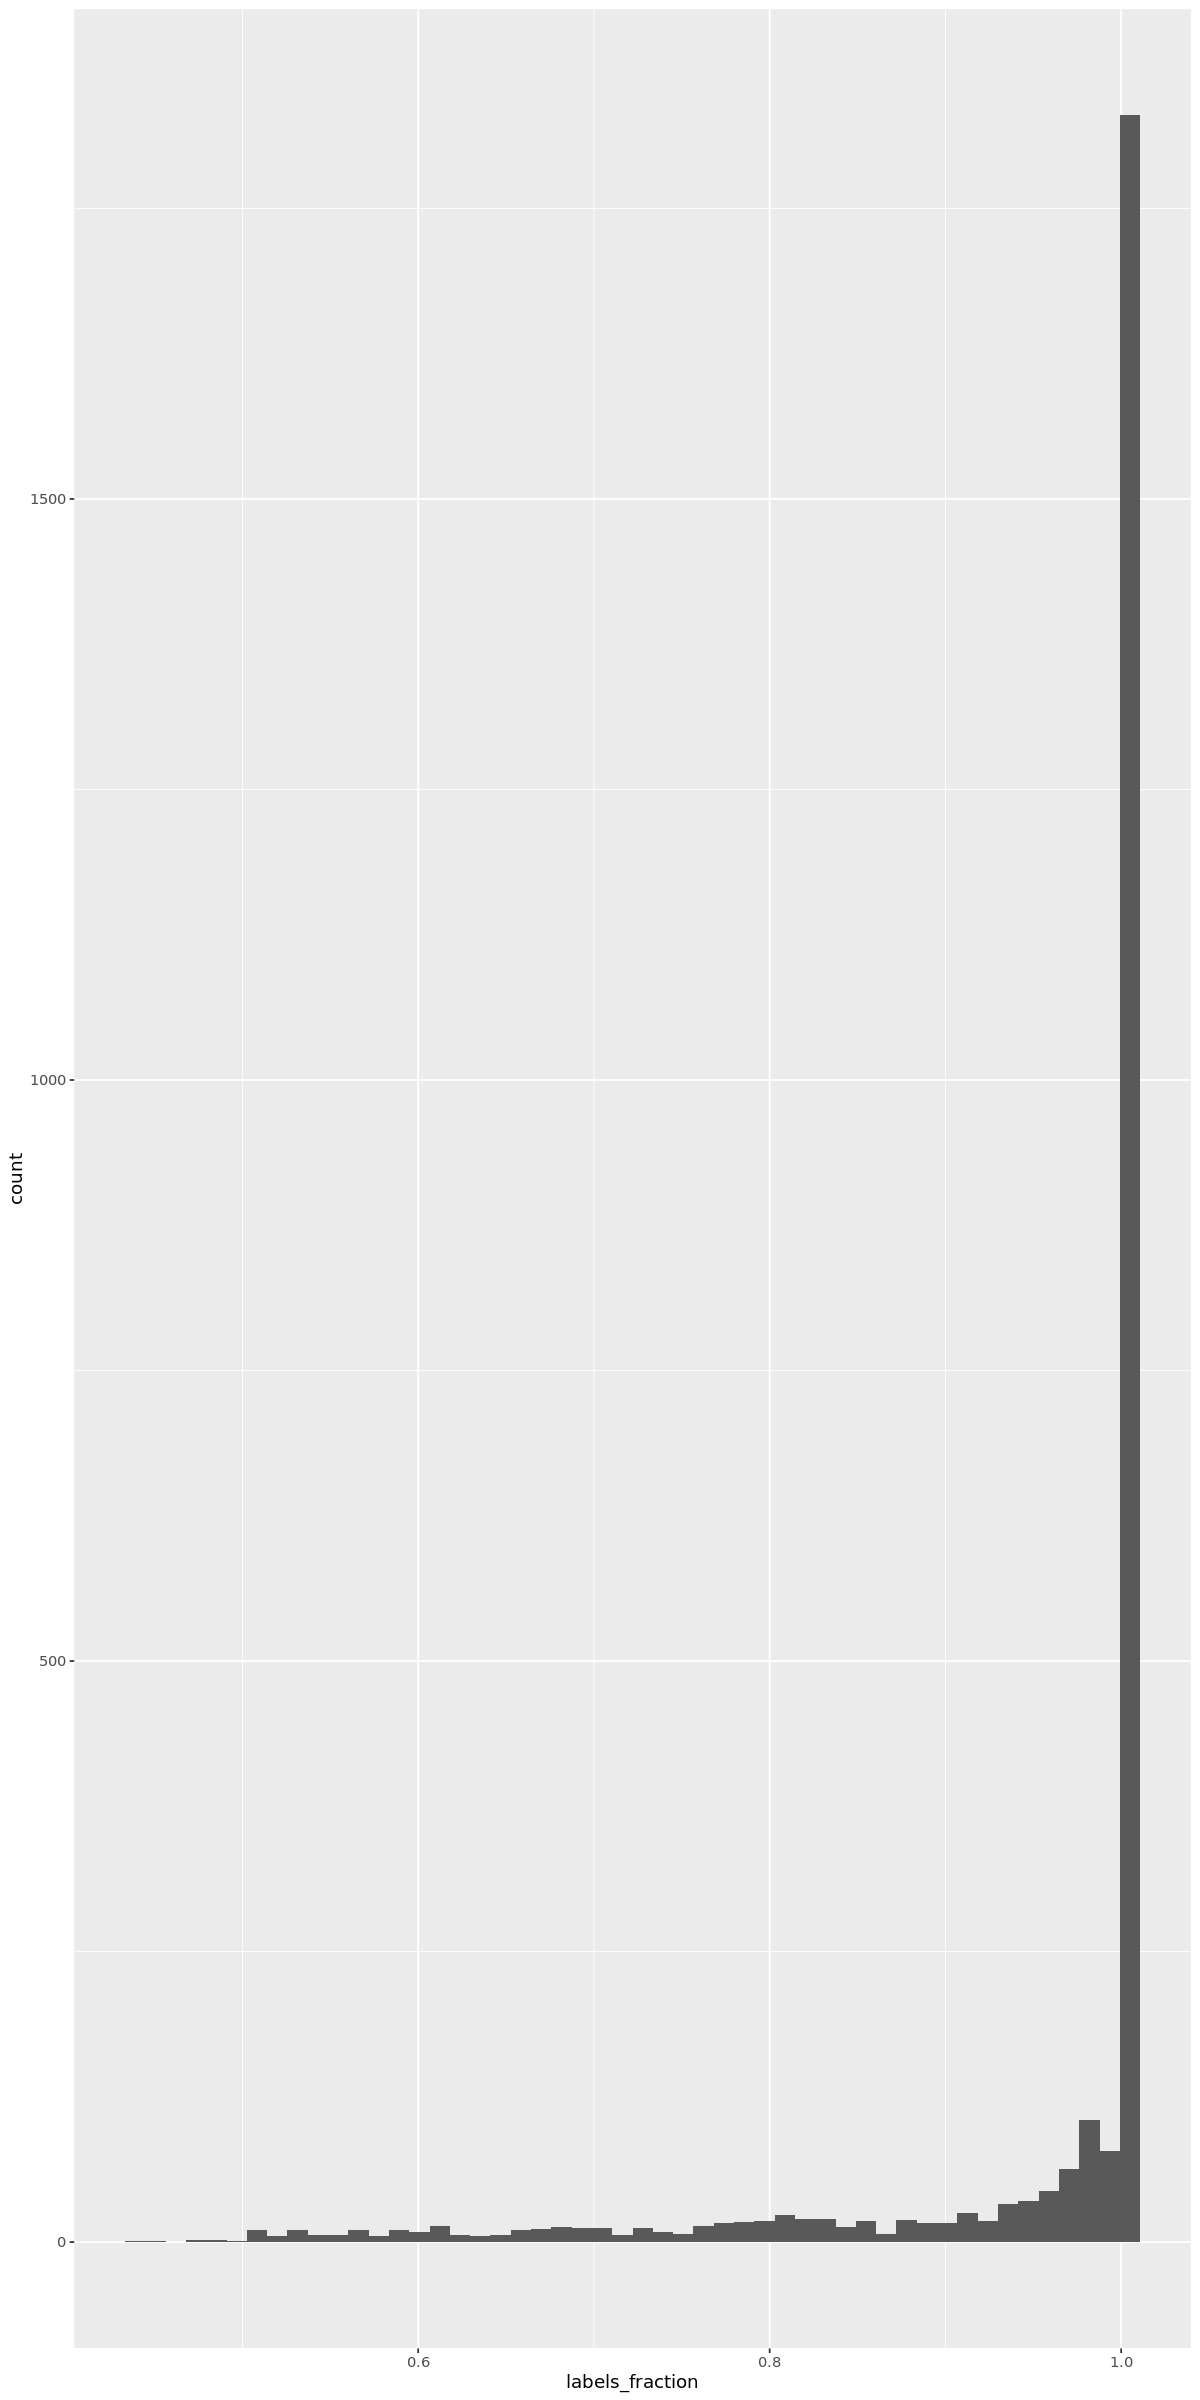

In [273]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [274]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.7, "Mixed", da_results$labels)

In [275]:
all_nhood = da_results %>%
group_by(labels) %>% 
summarise(n = n()) %>%
arrange(desc(n))

sig_nhood = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("significant" = "n")


sig_up = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] > 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("up" = "n") %>%
tidyr::complete()

sig_down = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] < 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("down" = "n") %>%
tidyr::complete()

nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")

In [276]:
dput(levels(nhood_summary$labels))

c("MOL-a2_Tanycytes", "Parstuber2A-ParsTuber1", "Endothelial", 
"Fibroblasts2-Fibroblasts3", "Mural_Cells2", "NFOL", "NG2_OPC2-Microglia", 
"Epend", "Microglia", "b2_Tany", "a2_Tanycytes-b1_Tanycytes", 
"Mixed", "NG2_OPC2", "a1_Tany-Astrocytes", "b1_Tanycytes", "a2_Tanycytes", 
"MOL", "Astrocytes")


In [277]:
da_results$labels = factor(da_results$labels, levels=levels(nhood_summary$labels))

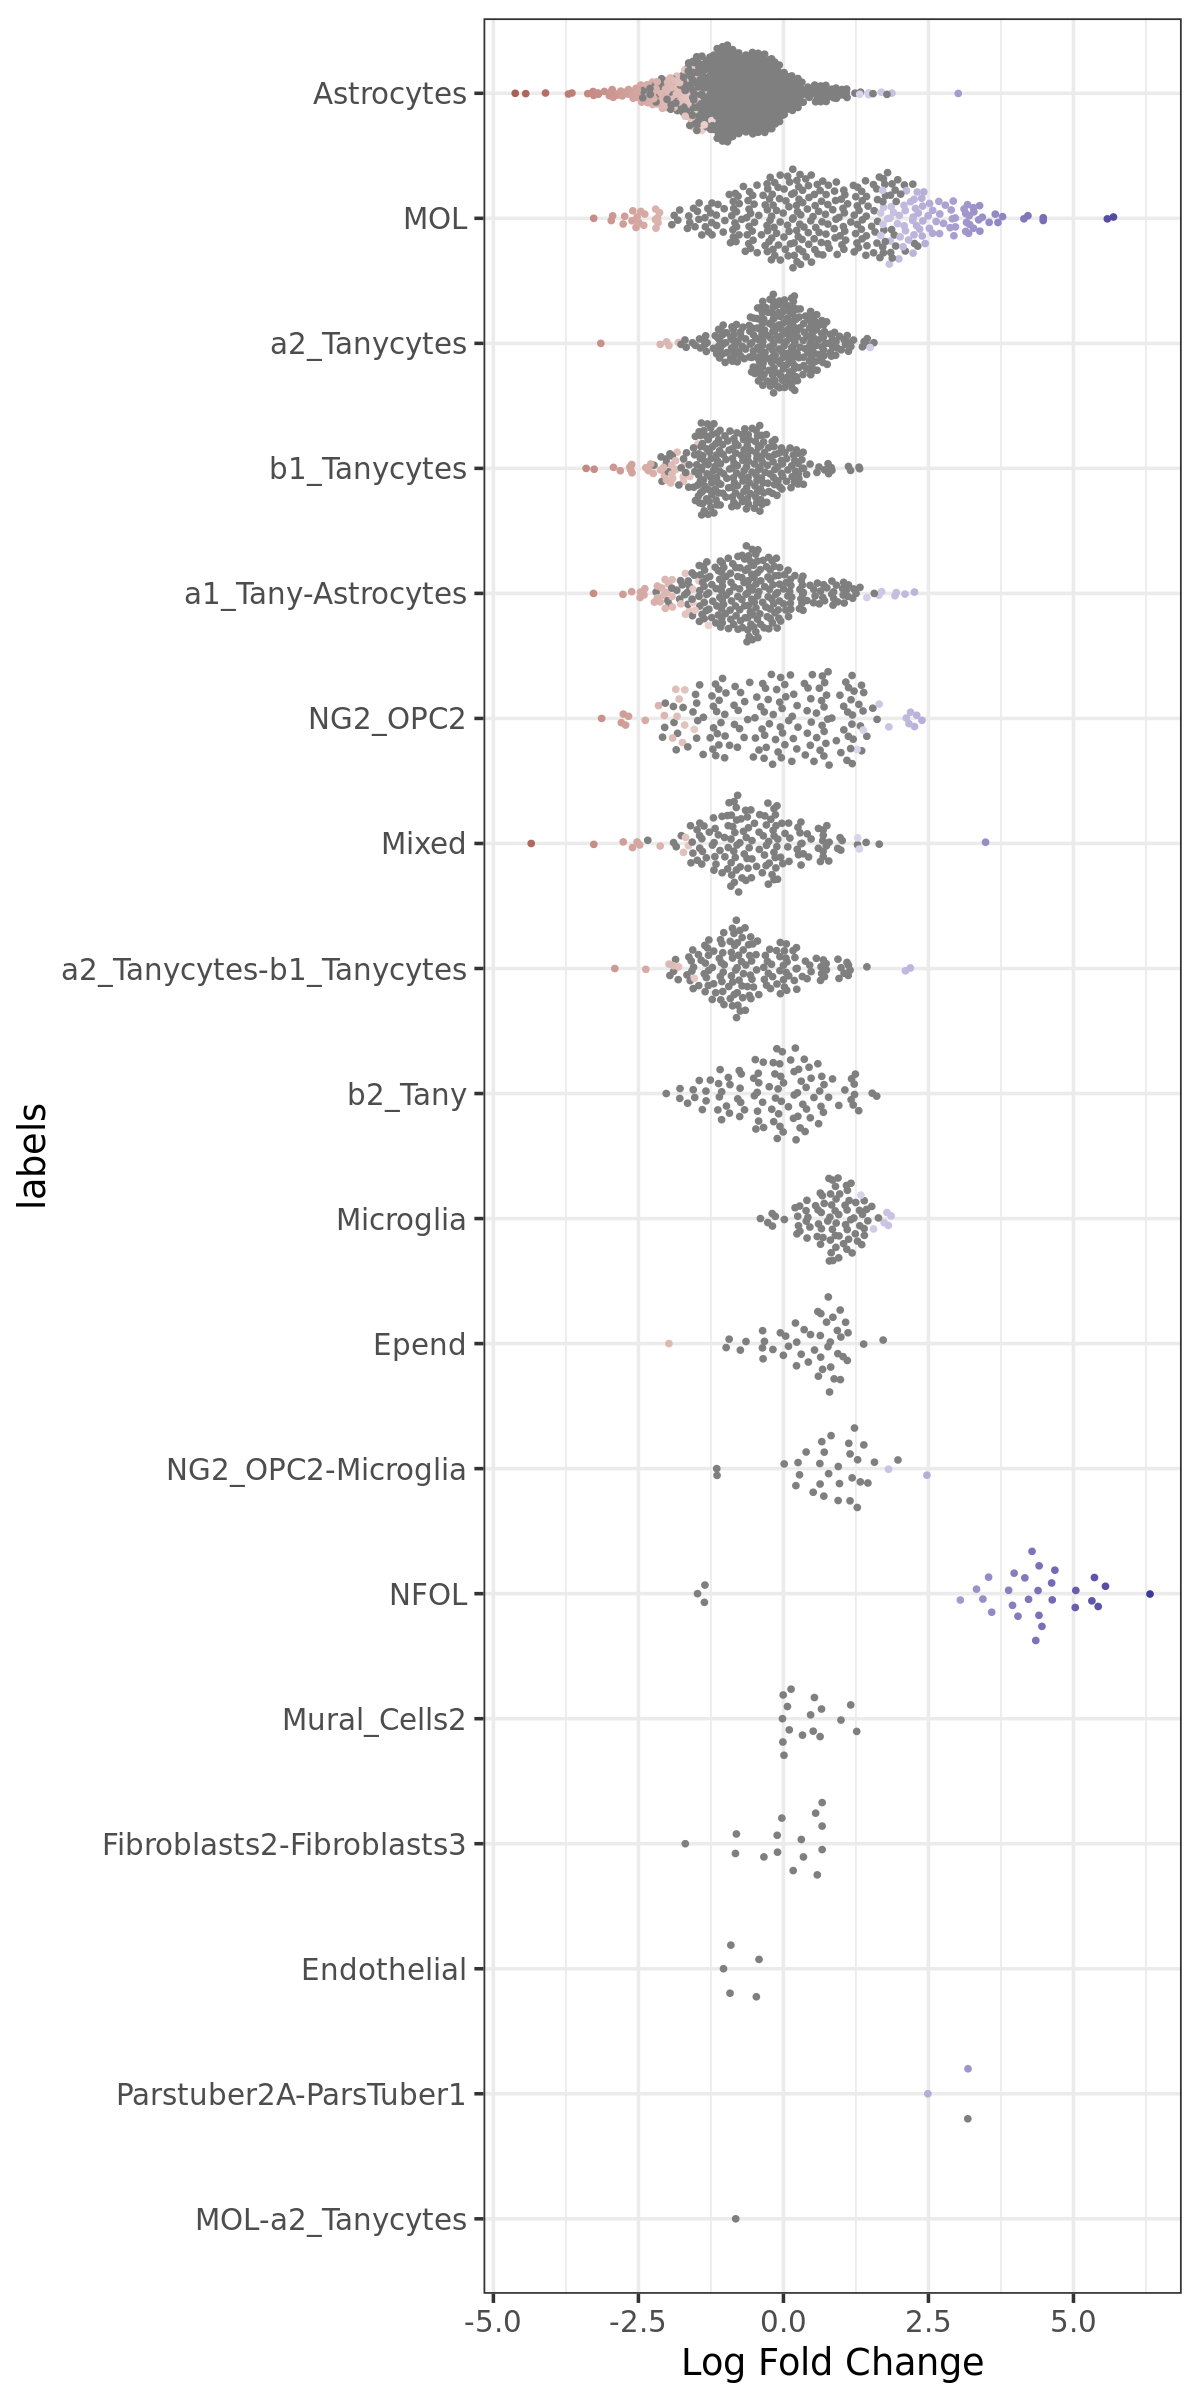

In [278]:
options(repr.plot.width=10, repr.plot.height=20)
pdab = plotDAbeeswarm(da_results, group.by = "labels", )
pdab

In [279]:
head(da_results)

logFC      logCPM    F         PValue      FDR        Nhood SpatialFDR labels             labels_fraction
1  0.7334450  8.982463 0.7926651 0.373446434 0.58889652 1     0.56431251 MOL                1.0000000      
2 -1.4569833 10.422220 9.2665469 0.002373109 0.03880473 2     0.03791721 a1_Tany-Astrocytes 0.9965035      
3  0.2240856  9.133370 0.1195876 0.729529240 0.86074256 3     0.84616414 b1_Tanycytes       0.8333333      
4  1.8589716  9.315251 8.7482634 0.003145968 0.04569501 4     0.04342121 MOL                1.0000000      
5 -1.4030128 10.633093 8.7559590 0.003132796 0.04569501 5     0.04342121 Astrocytes         0.8101983      
6 -2.4084376  9.065168 8.3707644 0.003866611 0.04972161 6     0.04676026 MOL                1.0000000

In [280]:
# neuron_clusters_summary = obj_neuron@meta.data %>%
#     group_by(labels) %>%
#     summarise(n = n()) %>%
#     arrange(desc(n))

In [281]:
nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")
nhood_summary

labels                    n   significant direction n_nhoods
1  MOL-a2_Tanycytes            1   0         up          0     
2  MOL-a2_Tanycytes            1   0         down        0     
3  Parstuber2A-ParsTuber1      3   2         up          2     
4  Parstuber2A-ParsTuber1      3   2         down        0     
5  Endothelial                 5   0         up          0     
6  Endothelial                 5   0         down        0     
7  Fibroblasts2-Fibroblasts3  15   0         up          0     
8  Fibroblasts2-Fibroblasts3  15   0         down        0     
9  Mural_Cells2               16   0         up          0     
10 Mural_Cells2               16   0         down        0     
11 NFOL                       30  27         up         27     
12 NFOL                       30  27         down        0     
13 NG2_OPC2-Microglia         32   2         up          2     
14 NG2_OPC2-Microglia         32   2         down        0     
15 Epend                      47   1         up          0     
16 Epend                      47   1         down        1     
17 Microglia                  85   6         up          6     
18 Microglia                  85   6         down        0     
19 b2_Tany                    98   0         up          0     
20 b2_Tany                    98   0         down        0     
21 a2_Tanycytes-b1_Tanycytes 153   8         up          2     
22 a2_Tanycytes-b1_Tanycytes 153   8         down        6     
23 Mixed                     155  13         up          3     
24 Mixed                     155  13         down       10     
25 NG2_OPC2                  166  26         up         10     
26 NG2_OPC2                  166  26         down       16     
27 a1_Tany-Astrocytes        263  37         up          7     
28 a1_Tany-Astrocytes        263  37         down       30     
29 b1_Tanycytes              270  28         up          0     
30 b1_Tanycytes              270  28         down       28     
31 a2_Tanycytes              281   6         up          1     
32 a2_Tanycytes              281   6         down        5     
33 MOL                       347 101         up         82     
34 MOL                       347 101         down       19     
35 Astrocytes                682 119         up          6     
36 Astrocytes                682 119         down      113

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



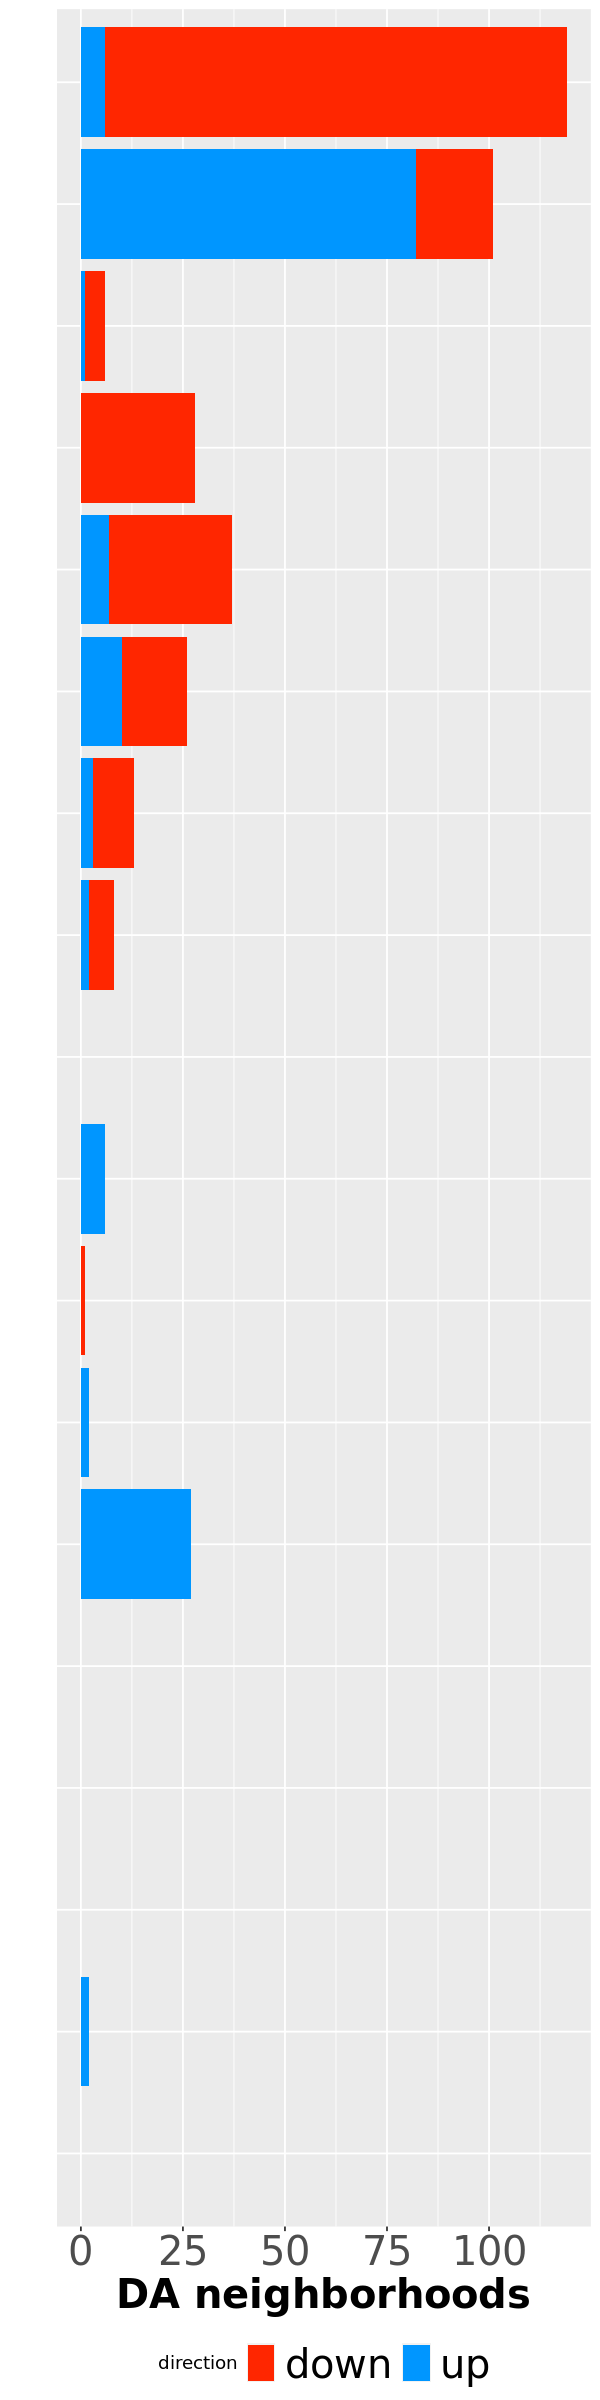

In [282]:
options(repr.plot.width=5, repr.plot.height=20)
dap = ggplot(nhood_summary, aes(fill=direction, y=labels, x=n_nhoods)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DA neighborhoods") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
                 axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "") +
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dap

In [283]:
degs = readr::read_csv('../00_preprocessing/degs_other.csv')

Rows: 154384 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): id, cluster_name, comparison
dbl (5): logFC, logCPM, F, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [284]:
degs = degs %>%
filter(comparison == '1*groupFGF1.Day14 -1*groupVeh_PF.Day14') %>%
filter(FDR < 0.05)
degs$cluster_name = factor(degs$cluster_name, levels=unique(nhood_summary$labels))
head(degs)

id       cluster_name comparison                             logFC      logCPM   F        PValue       FDR         
1 Rmi2     NG2_OPC2     1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -1.9955525 4.127368 28.31325 8.829714e-07 6.609041e-03
2 Cntnap5b NG2_OPC2     1*groupFGF1.Day14 -1*groupVeh_PF.Day14  0.5334695 6.798768 22.17231 1.005226e-05 3.762058e-02
3 Nckap5   b2_Tany      1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.6428643 9.576899 33.29231 6.466146e-07 3.677297e-03
4 Cask     b2_Tany      1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.7128543 7.600765 24.70662 9.770243e-06 2.778169e-02
5 Cers6    a2_Tanycytes 1*groupFGF1.Day14 -1*groupVeh_PF.Day14  1.4669805 5.753754 51.89486 1.949499e-09 1.701718e-05
6 Peak1    a2_Tanycytes 1*groupFGF1.Day14 -1*groupVeh_PF.Day14  0.6662451 7.175517 30.46102 1.000454e-06 4.366482e-03

In [285]:
nhood_summary

labels                    n   significant direction n_nhoods
1  MOL-a2_Tanycytes            1   0         up          0     
2  MOL-a2_Tanycytes            1   0         down        0     
3  Parstuber2A-ParsTuber1      3   2         up          2     
4  Parstuber2A-ParsTuber1      3   2         down        0     
5  Endothelial                 5   0         up          0     
6  Endothelial                 5   0         down        0     
7  Fibroblasts2-Fibroblasts3  15   0         up          0     
8  Fibroblasts2-Fibroblasts3  15   0         down        0     
9  Mural_Cells2               16   0         up          0     
10 Mural_Cells2               16   0         down        0     
11 NFOL                       30  27         up         27     
12 NFOL                       30  27         down        0     
13 NG2_OPC2-Microglia         32   2         up          2     
14 NG2_OPC2-Microglia         32   2         down        0     
15 Epend                      47   1         up          0     
16 Epend                      47   1         down        1     
17 Microglia                  85   6         up          6     
18 Microglia                  85   6         down        0     
19 b2_Tany                    98   0         up          0     
20 b2_Tany                    98   0         down        0     
21 a2_Tanycytes-b1_Tanycytes 153   8         up          2     
22 a2_Tanycytes-b1_Tanycytes 153   8         down        6     
23 Mixed                     155  13         up          3     
24 Mixed                     155  13         down       10     
25 NG2_OPC2                  166  26         up         10     
26 NG2_OPC2                  166  26         down       16     
27 a1_Tany-Astrocytes        263  37         up          7     
28 a1_Tany-Astrocytes        263  37         down       30     
29 b1_Tanycytes              270  28         up          0     
30 b1_Tanycytes              270  28         down       28     
31 a2_Tanycytes              281   6         up          1     
32 a2_Tanycytes              281   6         down        5     
33 MOL                       347 101         up         82     
34 MOL                       347 101         down       19     
35 Astrocytes                682 119         up          6     
36 Astrocytes                682 119         down      113

In [286]:
degs_up = degs %>%
filter(logFC > 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(up = n())

degs_down = degs %>%
filter(logFC < 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(down = n())

degs_summary = plyr::join_all(list(degs_up, degs_down), by = 'cluster_name')
degs_summary = degs_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_degs")
degs_summary

cluster_name              direction n_degs
1  MOL-a2_Tanycytes          up         0    
2  MOL-a2_Tanycytes          down       0    
3  Parstuber2A-ParsTuber1    up         0    
4  Parstuber2A-ParsTuber1    down       0    
5  Endothelial               up         0    
6  Endothelial               down       0    
7  Fibroblasts2-Fibroblasts3 up         0    
8  Fibroblasts2-Fibroblasts3 down       0    
9  Mural_Cells2              up         0    
10 Mural_Cells2              down       0    
11 NFOL                      up         0    
12 NFOL                      down       0    
13 NG2_OPC2-Microglia        up         0    
14 NG2_OPC2-Microglia        down       0    
15 Epend                     up         0    
16 Epend                     down       0    
17 Microglia                 up         0    
18 Microglia                 down       0    
19 b2_Tany                   up         0    
20 b2_Tany                   down       2    
21 a2_Tanycytes-b1_Tanycytes up         1    
22 a2_Tanycytes-b1_Tanycytes down       0    
23 Mixed                     up         0    
24 Mixed                     down       0    
25 NG2_OPC2                  up         1    
26 NG2_OPC2                  down       1    
27 a1_Tany-Astrocytes        up         5    
28 a1_Tany-Astrocytes        down       0    
29 b1_Tanycytes              up         9    
30 b1_Tanycytes              down       9    
31 a2_Tanycytes              up         7    
32 a2_Tanycytes              down       3    
33 MOL                       up         0    
34 MOL                       down       0    
35 Astrocytes                up        16    
36 Astrocytes                down       1

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



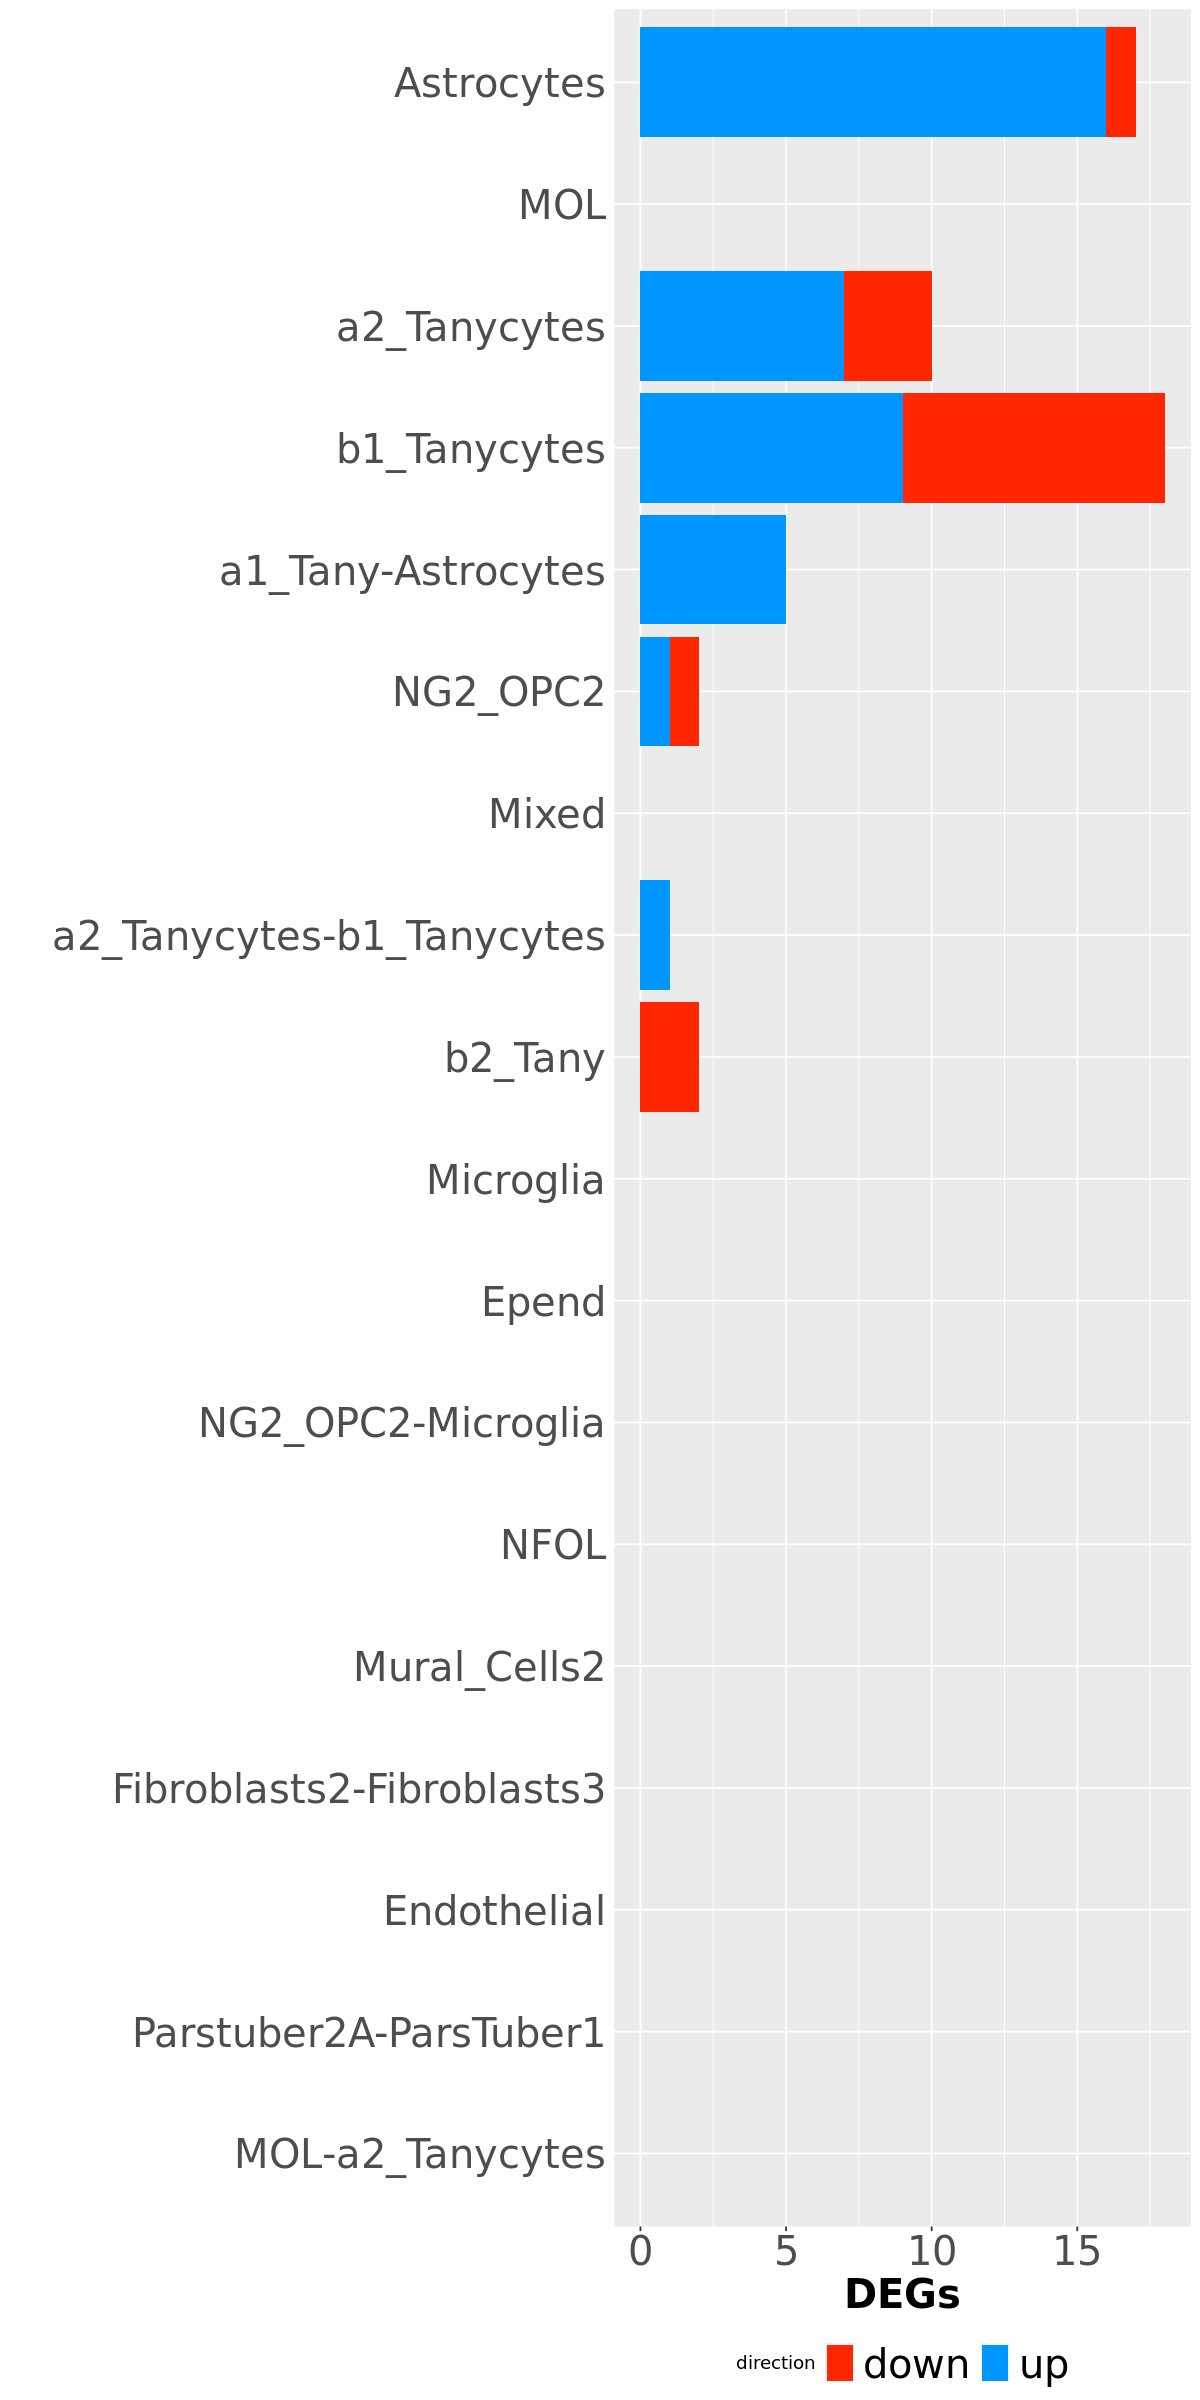

In [287]:
options(repr.plot.width=10, repr.plot.height=20)
dgp = ggplot(degs_summary, aes(fill=direction, y=cluster_name, x=n_degs)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DEGs") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
#                  axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "")+
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dgp

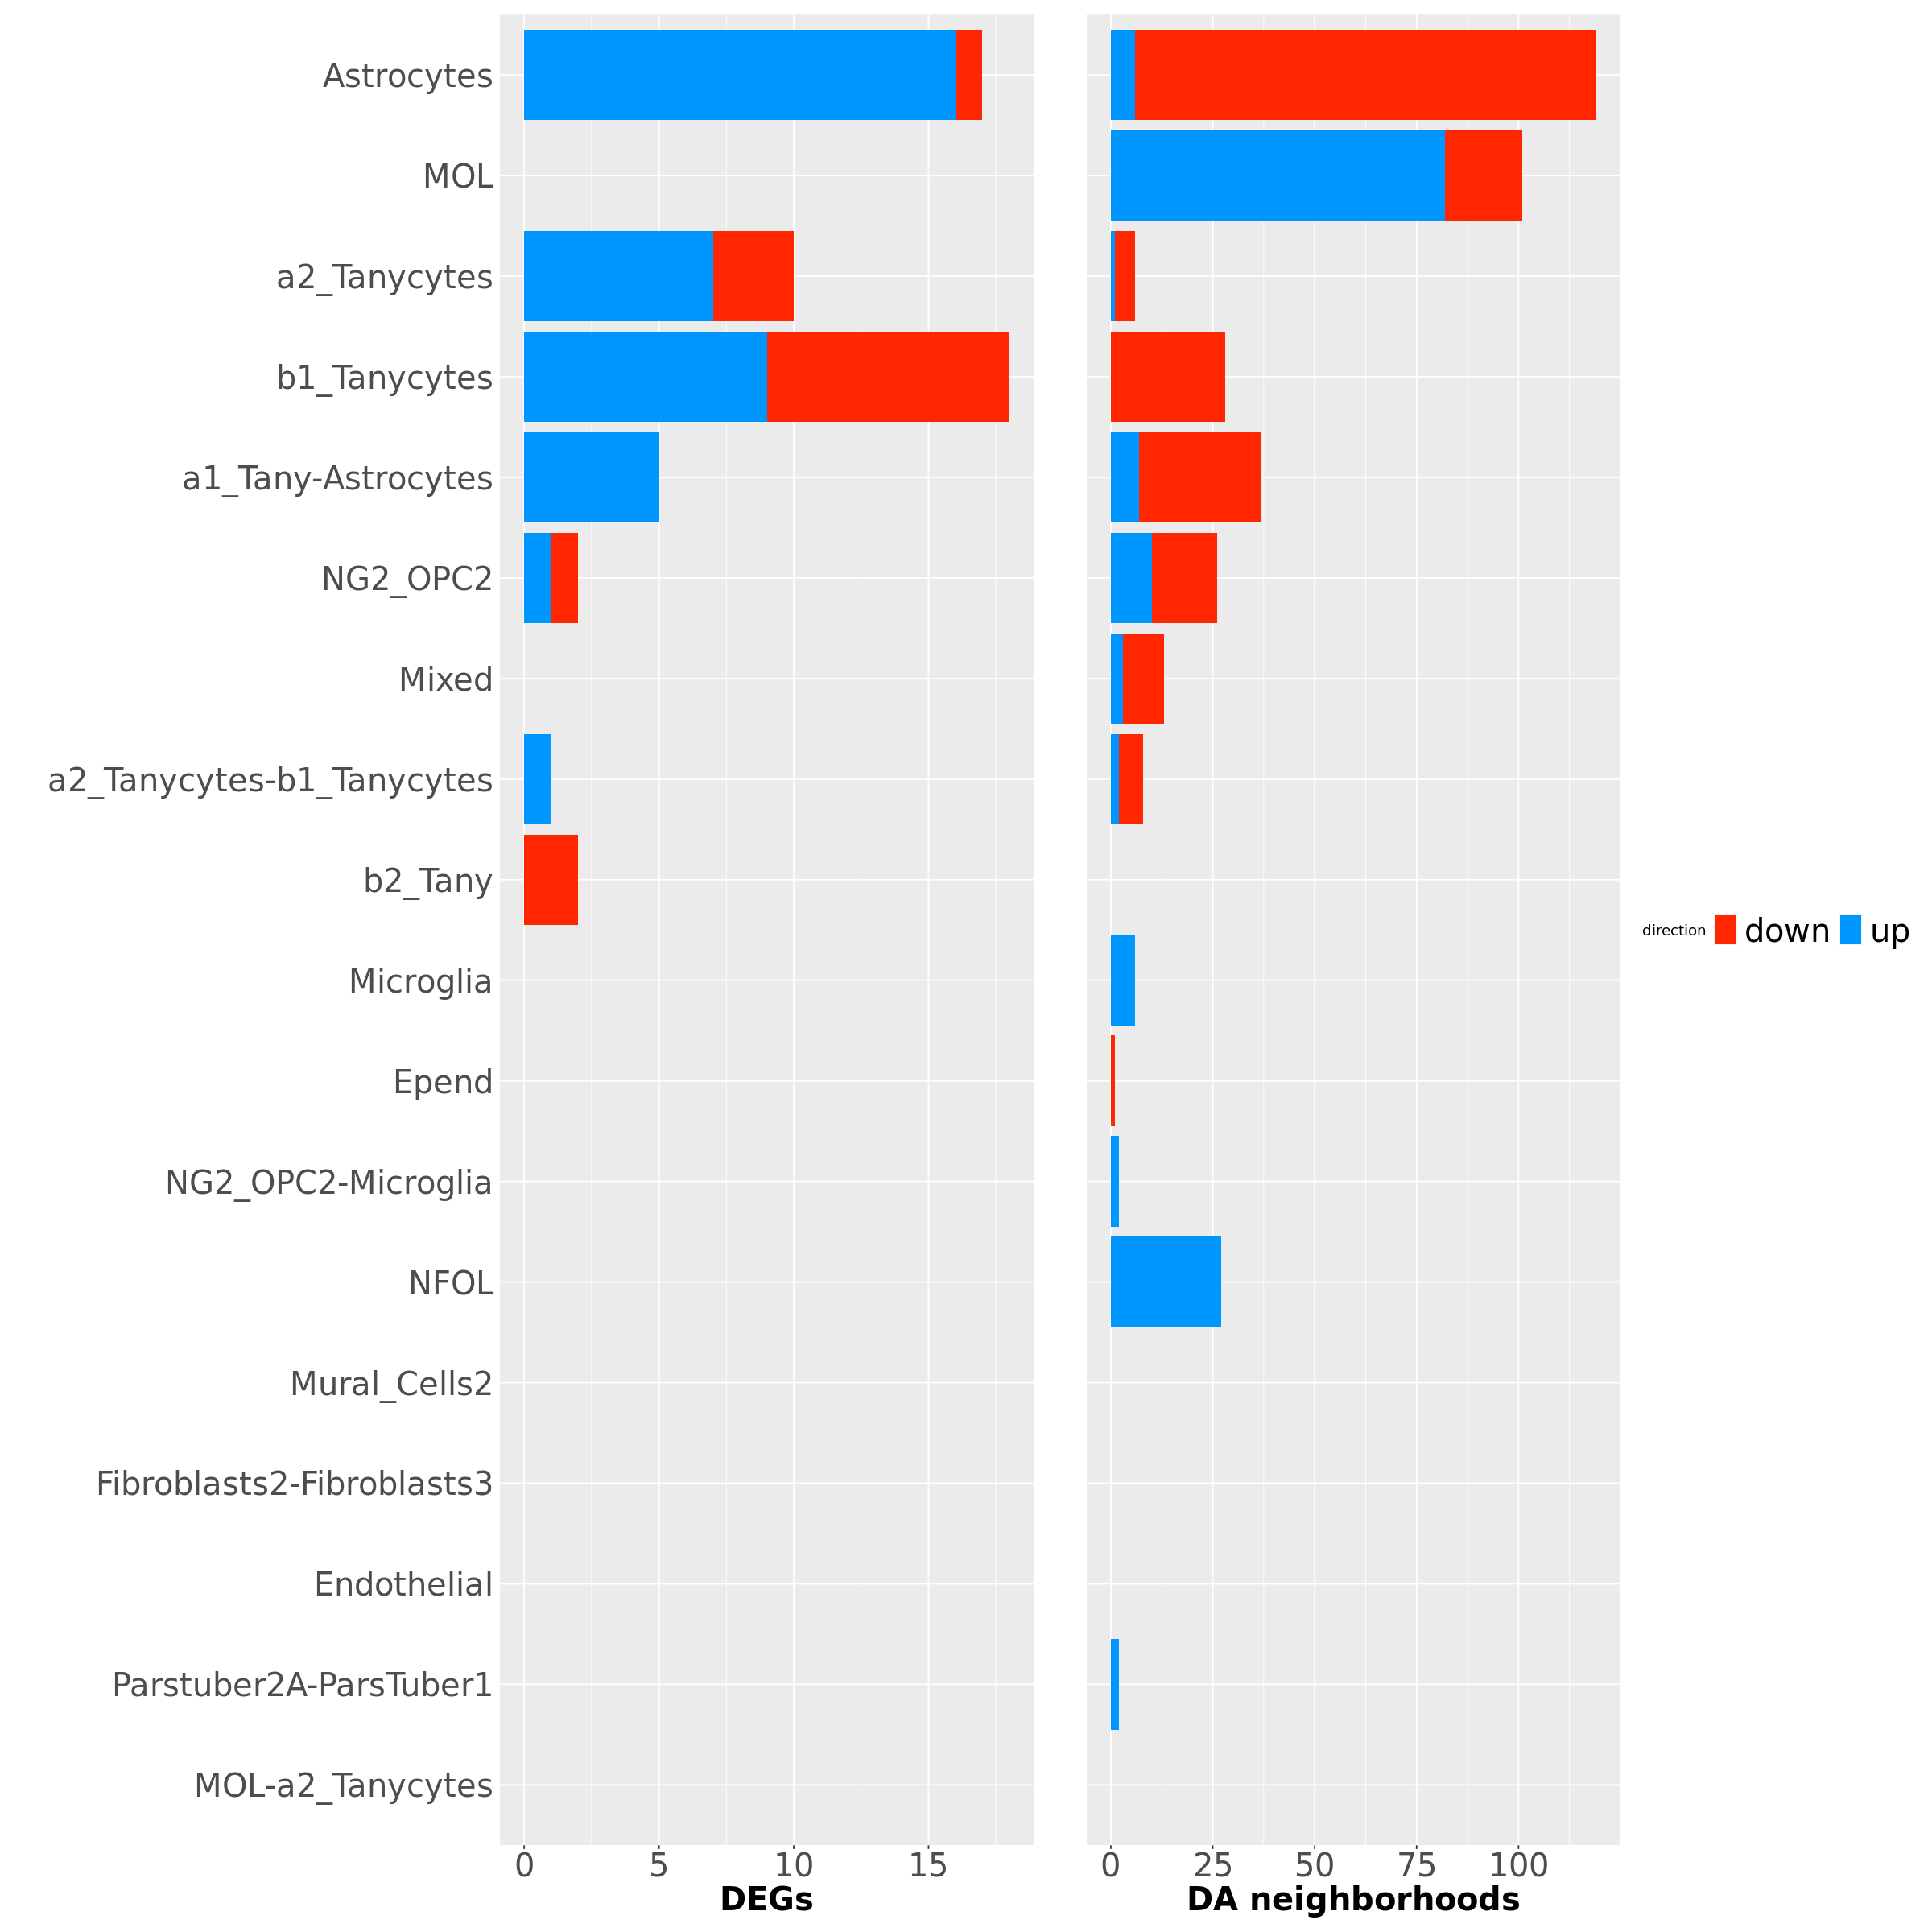

In [288]:
options(repr.plot.width=20, repr.plot.height=20)
dgp + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

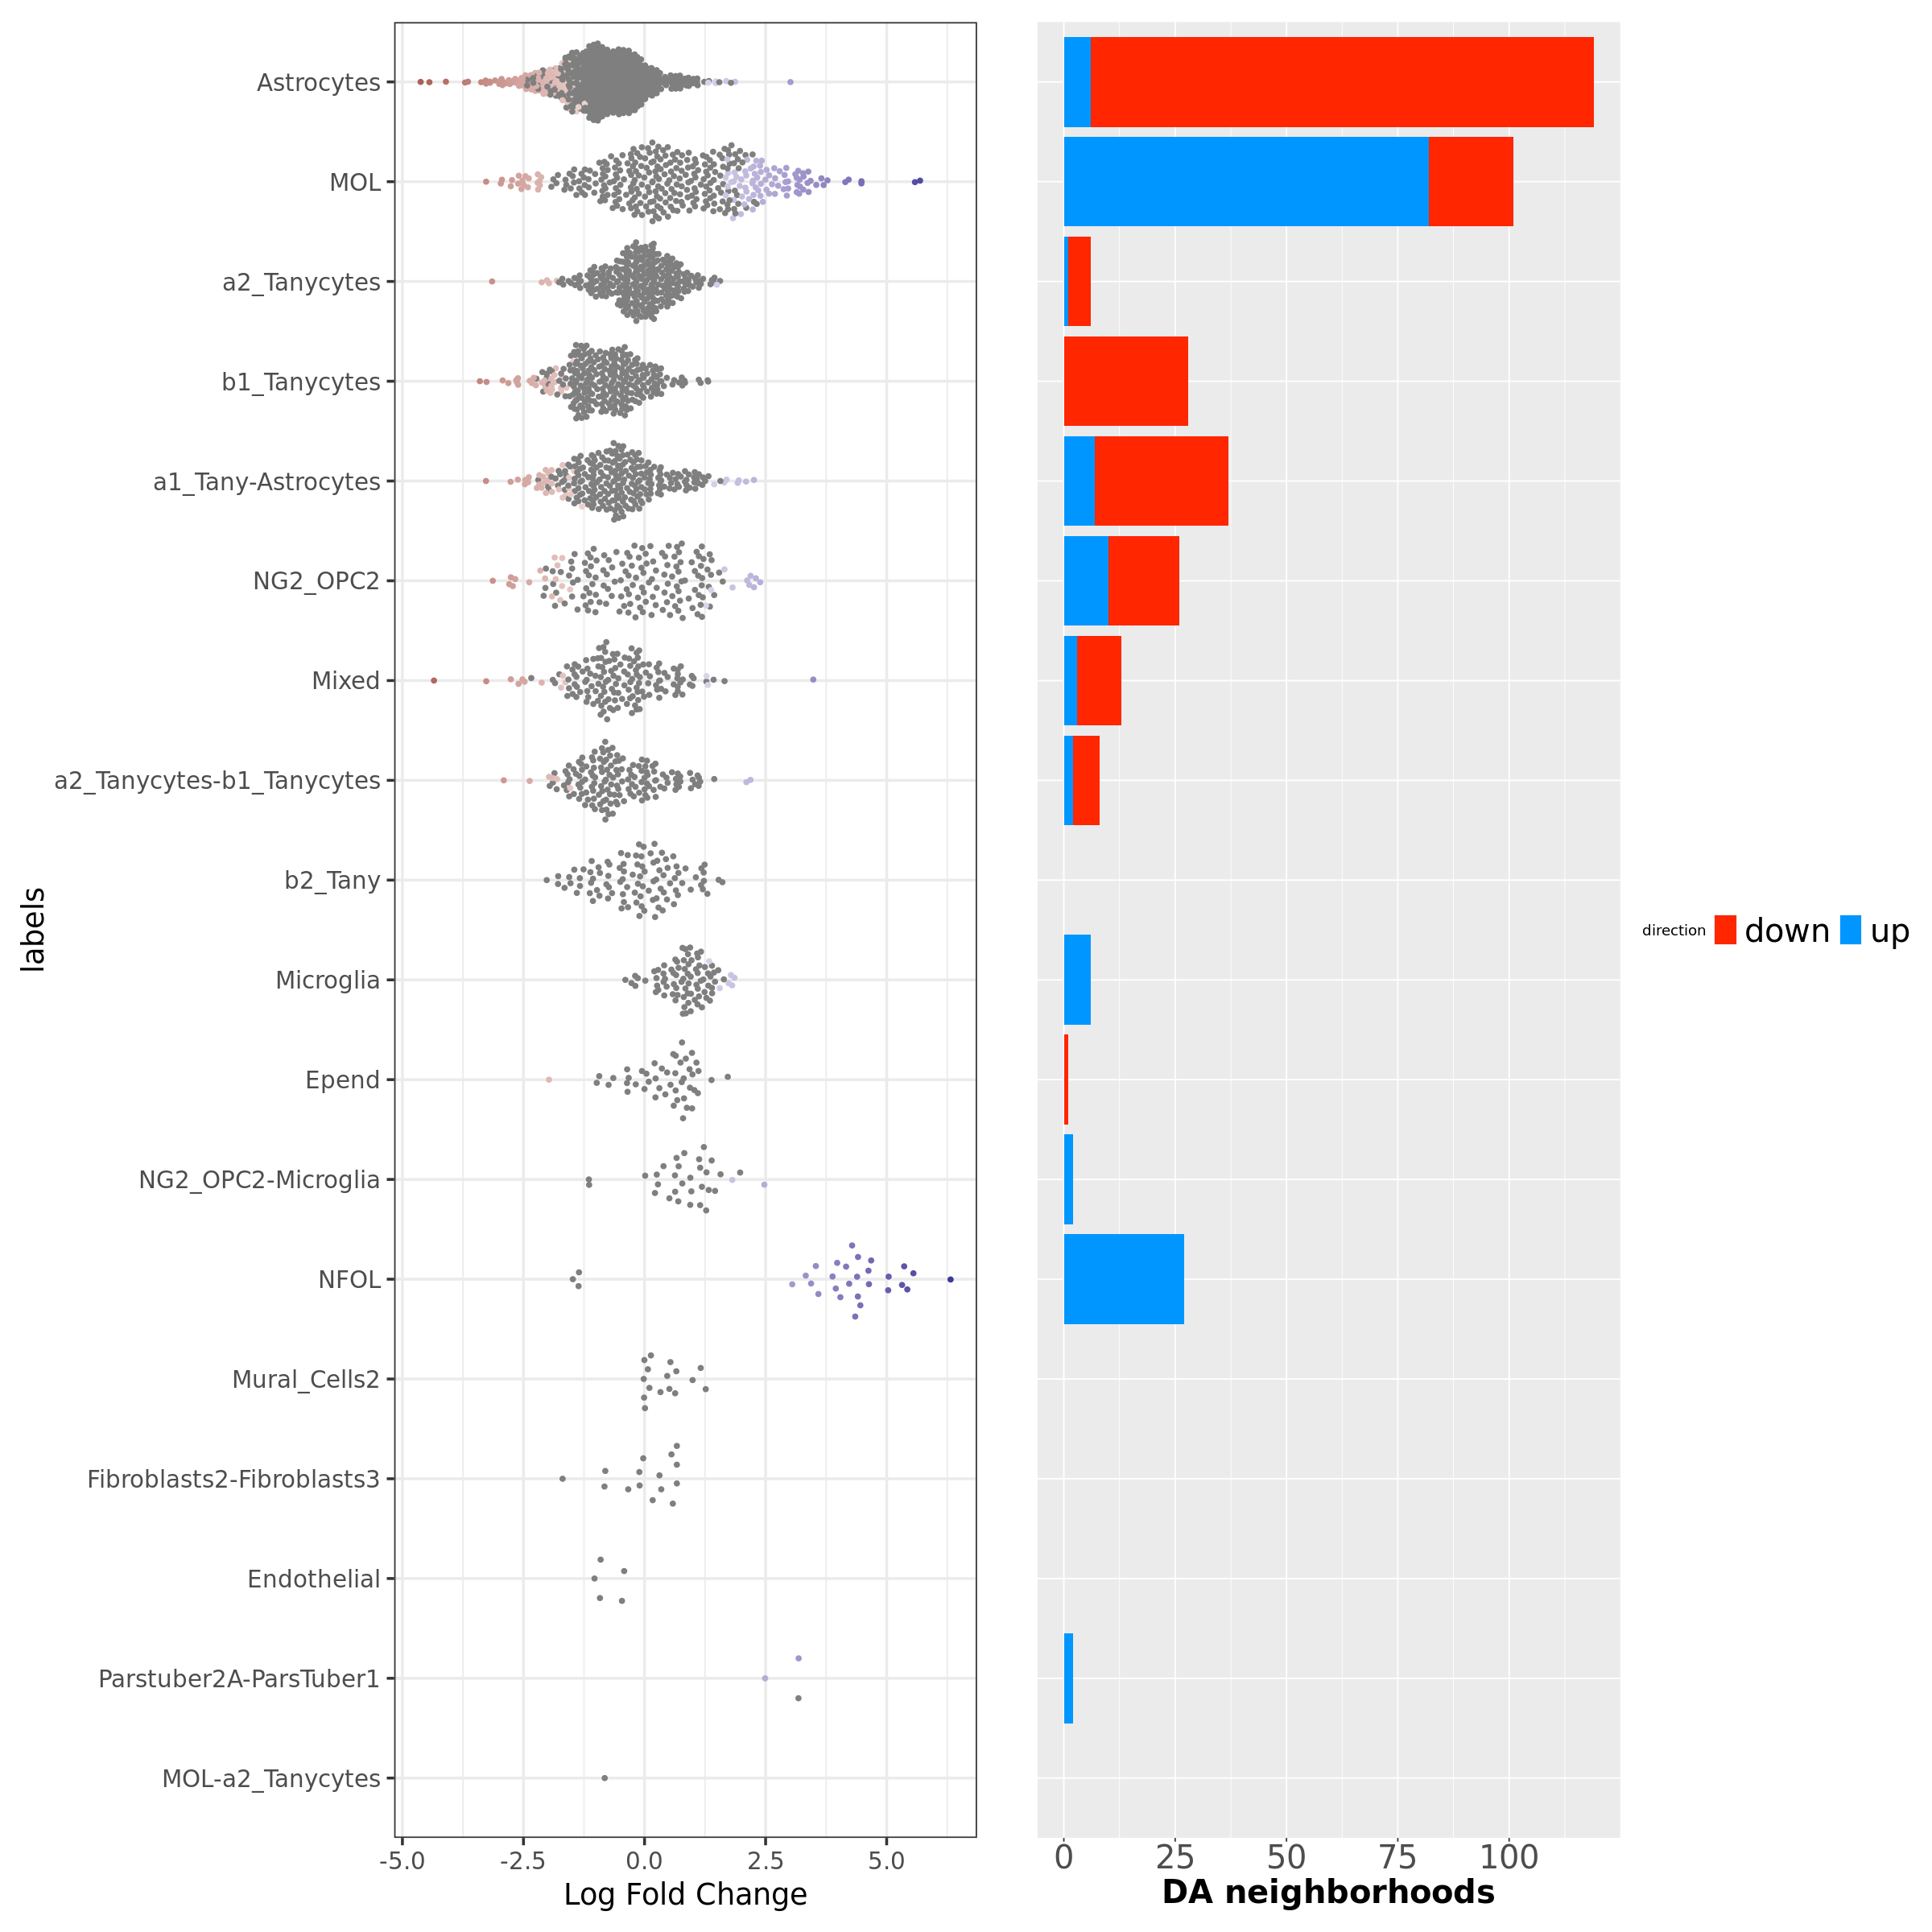

In [289]:
options(repr.plot.width=20, repr.plot.height=20)
pdab + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

In [290]:
## Exclude zero counts genes
keep.rows <- rowSums(logcounts(obob_milo)) != 0
obob_milo <- obob_milo[keep.rows, ]

## Find HVGs
set.seed(101)
dec <- scran::modelGeneVar(obob_milo)
hvgs <- scran::getTopHVGs(dec, n=3000)
head(hvgs)

[1] "Gpc5"   "Trpm3"  "Ntm"    "Kcnd2"  "Slit2"  "Nkain2"

In [343]:

# daf = da_results %>%
# dplyr::filter(labels == "Unassigned1" &
#               SpatialFDR < 0.1 &
#               logFC > 0)
# daf$NhoodGroup = 'blah'
# daf
da_results$NhoodGroup = paste0(da_results$labels, '.',
                               'fc', as.numeric(da_results$logFC > 0), '.',
                               'FDR', as.numeric(da_results$SpatialFDR < 0.1))
head(da_results)

logFC      logCPM    F         PValue      FDR        Nhood SpatialFDR labels             labels_fraction
1  0.7334450  8.982463 0.7926651 0.373446434 0.58889652 1     0.56431251 MOL                1.0000000      
2 -1.4569833 10.422220 9.2665469 0.002373109 0.03880473 2     0.03791721 a1_Tany-Astrocytes 0.9965035      
3  0.2240856  9.133370 0.1195876 0.729529240 0.86074256 3     0.84616414 b1_Tanycytes       0.8333333      
4  1.8589716  9.315251 8.7482634 0.003145968 0.04569501 4     0.04342121 MOL                1.0000000      
5 -1.4030128 10.633093 8.7559590 0.003132796 0.04569501 5     0.04342121 Astrocytes         0.8101983      
6 -2.4084376  9.065168 8.3707644 0.003866611 0.04972161 6     0.04676026 MOL                1.0000000      
  NhoodGroup                 
1 MOL.fc1.FDR0               
2 a1_Tany-Astrocytes.fc0.FDR1
3 b1_Tanycytes.fc1.FDR0      
4 MOL.fc1.FDR1               
5 Astrocytes.fc0.FDR1        
6 MOL.fc0.FDR1

In [344]:
da_results$NhoodGroup %>% unique

[1] "MOL.fc1.FDR0"                       "a1_Tany-Astrocytes.fc0.FDR1"        "b1_Tanycytes.fc1.FDR0"             
 [4] "MOL.fc1.FDR1"                       "Astrocytes.fc0.FDR1"                "MOL.fc0.FDR1"                      
 [7] "Astrocytes.fc0.FDR0"                "Parstuber2A-ParsTuber1.fc1.FDR1"    "Microglia.fc1.FDR0"                
[10] "a2_Tanycytes.fc1.FDR0"              "b1_Tanycytes.fc0.FDR0"              "a2_Tanycytes-b1_Tanycytes.fc0.FDR0"
[13] "a1_Tany-Astrocytes.fc0.FDR0"        "Astrocytes.fc1.FDR0"                "Microglia.fc0.FDR0"                
[16] "Mixed.fc0.FDR0"                     "Epend.fc1.FDR0"                     "MOL.fc0.FDR0"                      
[19] "b2_Tany.fc1.FDR0"                   "NG2_OPC2.fc0.FDR0"                  "Epend.fc0.FDR0"                    
[22] "a2_Tanycytes.fc0.FDR0"              "Fibroblasts2-Fibroblasts3.fc1.FDR0" "NG2_OPC2.fc1.FDR0"                 
[25] "a1_Tany-Astrocytes.fc1.FDR0"        "a2_Tanycytes-b1_Tanycytes.fc1.FDR0" "NG2_OPC2-Microglia.fc1.FDR0"       
[28] "a1_Tany-Astrocytes.fc1.FDR1"        "Mural_Cells2.fc1.FDR0"              "NFOL.fc1.FDR1"                     
[31] "b2_Tany.fc0.FDR0"                   "b1_Tanycytes.fc0.FDR1"              "Mixed.fc1.FDR0"                    
[34] "Mural_Cells2.fc0.FDR0"              "Microglia.fc1.FDR1"                 "Fibroblasts2-Fibroblasts3.fc0.FDR0"
[37] "NG2_OPC2.fc1.FDR1"                  "Mixed.fc0.FDR1"                     "a2_Tanycytes.fc0.FDR1"             
[40] "Endothelial.fc0.FDR0"               "NG2_OPC2-Microglia.fc1.FDR1"        "NG2_OPC2.fc0.FDR1"                 
[43] "NFOL.fc0.FDR0"                      "Parstuber2A-ParsTuber1.fc1.FDR0"    "Mixed.fc1.FDR1"                    
[46] "NG2_OPC2-Microglia.fc0.FDR0"        "a2_Tanycytes-b1_Tanycytes.fc0.FDR1" "Astrocytes.fc1.FDR1"               
[49] "a2_Tanycytes-b1_Tanycytes.fc1.FDR1" "MOL-a2_Tanycytes.fc0.FDR0"          "a2_Tanycytes.fc1.FDR1"             
[52] "Epend.fc0.FDR1"

In [345]:
# subset_groups = c("Astrocytes.fc0.FDR0", "Astrocytes.fc0.FDR1", "Astrocytes.fc1.FDR0", "Astrocytes.fc1.FDR1")
subset_groups = c("MOL.fc0.FDR0", "MOL.fc0.FDR1", "MOL.fc1.FDR0", "MOL.fc1.FDR1")
# subset_groups = c("NFOL.fc0.FDR0", "NFOL.fc1.FDR1")
nhood_markers <- findNhoodGroupMarkers(obob_milo,
                                       da_results,
                                       subset.row=hvgs,
                                       sample_col = "hash.mcl.ID",
                                      subset.groups=subset_groups)
nhood_markers

GeneID        logFC_MOL.fc0.FDR0 adj.P.Val_MOL.fc0.FDR0 logFC_MOL.fc0.FDR1 adj.P.Val_MOL.fc0.FDR1
1    0610040J01Rik -0.1519923533       7.216203e-29          -0.162477804       7.775558e-02          
2    1110004F10Rik -0.1068660662       3.895873e-12          -0.099348952       3.864319e-01          
3    1110019D14Rik -0.2466636396       4.339674e-28          -0.232045003       1.360235e-01          
4    1600020E01Rik -0.0108169922       4.441843e-01          -0.115663457       2.296942e-01          
5    1700012D14Rik -0.0269668114       7.552525e-02           0.087386425       4.395544e-01          
6    1700019D03Rik -0.0034062209       7.345564e-01          -0.028955748       7.066737e-01          
7    1700025G04Rik  0.3715503264       1.123771e-96           0.367623815       8.912115e-04          
8    1700028P14Rik -0.1133709216       1.510910e-16          -0.099738998       3.244877e-01          
9    1700047M11Rik  0.8669364914       0.000000e+00           0.458324174       1.308502e-08          
10   2210408F21Rik -0.4143616776       7.102677e-82          -0.172166967       2.756282e-01          
11   2210408I21Rik -0.2487401602       4.991033e-18           0.102175382       6.579266e-01          
12   2310022B05Rik -0.2373800685       9.975359e-40          -0.238824544       4.634034e-02          
13   2510009E07Rik -0.0575360591       1.826026e-04          -0.189061705       6.372206e-02          
14   2610316D01Rik  0.0473996475       6.915096e-03          -0.076719272       5.713230e-01          
15   2700049A03Rik -0.0027861058       8.508541e-01           0.018685170       8.798100e-01          
16   2810032G03Rik -0.0267605374       2.561191e-04          -0.021752623       7.139164e-01          
17   2810049E08Rik -0.0581170681       3.055741e-09          -0.033010698       6.751947e-01          
18   2810403D21Rik -0.2150960169       2.997509e-28          -0.291214616       2.212013e-02          
19   2900026A02Rik -0.1350126923       2.794251e-28          -0.067010237       4.796667e-01          
20   2900052N01Rik -0.0497613021       2.933985e-10          -0.039414341       5.193889e-01          
21   3010001F23Rik -0.0813835389       4.944643e-08          -0.079453401       4.904388e-01          
22   3110082I17Rik -0.1118843729       1.859239e-19          -0.044424505       6.559925e-01          
23   4930447C04Rik -0.0216875424       8.700856e-02           0.003899199       9.733676e-01          
24   4930447K03Rik -0.0649103430       1.094309e-14          -0.053283835       3.966072e-01          
25   4930474G06Rik  0.1415865486      2.459106e-200           0.084829527       4.875894e-03          
26   4930511M06Rik  0.6652900590       0.000000e+00           0.668252264       8.491824e-31          
27   4930555F03Rik -0.0005992435       9.717672e-01           0.011273749       9.362915e-01          
28   4930593A02Rik  0.1311085757       4.259164e-81           0.040511930       4.428781e-01          
29   4933406I18Rik -0.1783659039       2.194460e-34          -0.185516183       5.780778e-02          
30   5031439G07Rik  0.5675742464      8.485528e-149           0.363476799       1.035241e-02          
⋮    ⋮             ⋮                  ⋮                      ⋮                  ⋮                     
2971 Zfp618         0.001093859        8.929089e-01           0.047068038       4.120795e-01          
2972 Zfp652        -0.110598356        2.782208e-10          -0.095353183       4.796667e-01          
2973 Zfp658        -0.037350069        5.515984e-05          -0.041417854       5.642905e-01          
2974 Zfp697        -0.066512060        5.458058e-09          -0.032800619       7.277470e-01          
2975 Zfp704         0.416854414       6.353574e-136           0.271912088       1.295574e-02          
2976 Zfp710        -0.345647547        8.044962e-82          -0.298825470       1.022129e-02          
2977 Zfp760         0.050670959        6.597746e-06           0.027608484       7.688900e-0

In [312]:
nhood_markers %>%
# arrange(adj.P.Val_Astrocytes.fc1.FDR1) %>%
# filter(adj.P.Val_Astrocytes.fc1.FDR1 < 0.05) %>%
# filter(logFC_Astrocytes.fc1.FDR1 > 0) %>%
arrange(adj.P.Val_MOL.fc0.FDR1) %>%
filter(adj.P.Val_MOL.fc0.FDR1 < 0.05) %>%
filter(logFC_MOL.fc0.FDR1 > 0) %>%
# arrange(adj.P.Val_NFOL.fc1.FDR1) %>%
# filter(adj.P.Val_NFOL.fc1.FDR1 < 0.05) %>%
# filter(logFC_NFOL.fc1.FDR1 > 0) %>%
pull(GeneID) %>%
paste0(collapse = ' ')

[1] "1700047M11Rik 9530059O14Rik A930011G23Rik Ablim2 Abtb2 Adam23 Afap1l2 Ankrd28 Ankrd44 Arhgap20 Arhgap24 Arpp21 Bcas1 Brinp1 Cald1 Cask Cdc42se2 Cdh13 Cdk14 Cdyl Chn2 Chst8 Cilk1 Cnksr3 Cobll1 Csmd1 Csmd2 Ctnnal1 Cyfip2 D630045J12Rik Dnm3 Dscam Dscaml1 Dusp15 Elovl7 Enpp6 ENSMUSG00000085816 ENSMUSG00000118020 Epb41l2 Eya2 Fam13c Fam163a Fbn2 Frmd4a Fyn Gal3st1 Gjc3 Gm10863 Gnb4 Gria2 Grid1 Igsf9b Itpr2 Kazn Kcnq5 Lcorl Lima1 Lrrtm4 Man1c1 Map1b Mapt Mbp Mical3 Mitf Mpzl1 Nav1 Nav2 Neu4 Nfasc Nhsl2 Opcml Pak3 Pdcd4 Pik3r3 Pkp4 Plekha6 Plp1 Plxnb3 Ppfibp1 Ppm1l Prkcq Ptpn14 Ptpre Ptprj Ptpro Rapgef1 Reep1 Rtkn2 Sema3d Sema4d Sema5a Sez6l Sh3bp4 Sh3d19 Sh3rf1 Shc4 Shisal1 Sirt2 Slc1a1 Slc22a23 Slc44a1 Slit3 Snx30 Soga1 Sox10 Srcin1 St18 Sulf2 Susd4 Sytl5 Tbc1d8 Tmem108 Tmem132b Tmem132d Tmem163 Tnr Tns3 Trio Ust Vcan Wasf1 Zdhhc14 Znrf1 Phyhipl Gria4 Epha4 Glrb Myrf Pacs2 Ppp1r16b Snap91 Pcdh7 Sema5b Sox6 Zeb2 Parvb Fa2h Myo5a Dock4 Slc16a7 Dock9 Tubb4a Arhgap31 Rap2a Pde4d Ugt8a Adarb2 Zfp804a Vldlr Zfp827 A230057D06Rik Etv6 Tmeff2 Gfra1 Armh4 Fbxo7 Nrg1 Ccnjl Sgk1 Sh3gl3 Ncam2 Rap1gap Lhfpl3 Rin2 Jam3 Tcf7l2 Creb3l2 Irs1 Rnf144a Ube2e2 Mb21d2 Large1 Agpat4 Rell1 Bmerb1 Peli1 Ophn1 Homer2 Lamc1 Slc35f3 Arsb Mpped2 Cdc37l1 Svil Csgalnact1 Sh3gl2 Fchsd2 Phldb1 Ncald Cux2 Anks1b Tpd52 Csad Apba1 ENSMUSG00000098243 Ephb1 Gatm Pde4dip Vps8 Lama4 Slc44a5 Pde9a Spats2 Rap1gds1 Septin7 Ltbp1 Lrrc8b Plppr5 Snx1 Lhfpl2 Unc5c Lsamp Cyp2j6 Dbndd2 Mgll ENSMUSG00000113216 Cntn6 Rims1 Bcat1 Pld1 Fam189a1 Sestd1 Pard6g Ldlrad3 Myt1 Scel Enpp2 Rundc3b Kif21b Atp9a Nlk Ank3 Strn Serinc5 Cadm2 Rtn4 Dock6 Elmo1 6030407O03Rik Gab3 D16Ertd472e Frmd5 Arl15 Lingo2 E130308A19Rik Ctnna2 Chsy3 Zfp618 Susd5 Matn2 Kcnt2 Specc1 Kcnj3 Grid2 Fbxo32 Tsc22d1 Raph1 Nxph1 Spns2 Adamts17 Kcnq3 Cdh20 9330175M20Rik Gtf2f2 Ppp2r2a Gm4876 Fsd1l Scamp5 Abhd17b Car8 Arhgap23 Homer1 Reps2 Ppfibp2 App Epn2 Sipa1l2 Prom1 Scamp2 Pcdh17 Prickle1 Dlgap1 Nol4l D430041D05Rik Adcy10 Has2os Calcrl Lrrfip1 Ica1 Rmdn2 Cerk Nalcn Dach2 Pdzd8 Cacna1c Tnfrsf21 Foxn2 Prkcb Fbn1 Sorcs1 Rab40c Ifnar2 Aatf ENSMUSG00000097797 Aatk Xylt1 Osbpl1a Prag1 Klhl2 Bend7 Gmds Wipf1 Tcf7l1 Slc35f1 Epb41 Tln2 Zfhx2 Man1a2 Pcdh15 Ptpn11 Bin1 Cldn11 Snd1 Gria3 Peak1 Adam12 Khdrbs2 Arhgef2 Tgfa Shroom2 Gng12 Cbfb Nlgn1 Eps8 Wscd1 Il1rap Elf1 Atxn7l1 Frmd4b Neto1 Stard13 Slc2a13 Fam102a Me3 Marchf8 Ranbp17 Tshz3 Stard9 Gm20754 Lpcat2 Ralyl Lypd6 Arhgef28 Adcy5 Sik2 Asxl3 Tmem167 Rgcc Lrp4 Snx25 Lrrc8d Cpm Dok6 Pde4b Arhgef10 Crtac1 Wls Pip5k1b Csmd3 Prmt3 Msrb3 Kank1 Scn3a Nmnat2 Sntg1 Etl4 E2f3 Dock10 Slc4a7 Limd1 Agtpbp1 Prkd3 Zfp462 Ints6 Astn2 Lrmda Ralgapa2 Phactr1 Smad3 Luzp2 Zdhhc2 Prtg Macrod2 Dixdc1 Itga9 Rffl Lrrc7 Tpst1 Rras2 Rel Msh3 Zfp536 Tshz1 Tle4 Rybp Tafa2 Rnf43 Cacna1a Syne2 Slc24a3 Mag Plekhg1 Plcb1 Tmeff1 Rbbp8 A330049N07Rik Erc2 Coro1c Tub Tox3 Plppr1 Galnt13 Pdss1 Col27a1 Tyro3 Arhgap44 Taok3 Farp2 Ptprm Sdk1 Slc9a9 Cdh18 ENSMUSG00000079834 Phactr3 Abcc1 Dpp10 Ubl3 Kctd8 Grik4 ENSMUSG00000089940 Nin Ppp2r3a Ndufaf2 Ubtd2 Elavl3 Dnah10 Hs3st1 Yaf2 Prkg1 Laptm4b Cntn4 Myt1l Gramd3 Pde8b Nfe2l3 Kif21a Cdh10 1700025G04Rik Abhd12 Pkia Ddc Rbpj Pdzrn4 Diaph3 Ola1 Gm31508 Epb41l4b Ehd4 Camk4 Arhgef3 Stim2 5330434G04Rik Pmepa1 Erbb4 Tbc1d8b Aff3 Cdh6 Fgf12 Nectin3 Mthfd1l Plcl1 Sycp2 Acyp2 Abhd2 Vwc2 Uri1 Stxbp5l Jpx Tanc1 ENSMUSG00000021745 Otud7b ENSMUSG00000084873 Glis1 Glcci1 Rad51b 5430431A17Rik Mcm9 Cryl1 Ttyh2 Mtmr7 Sgip1 Hhip Faxc Syn3 Jam2 Ube2g1 Tbc1d16 Agbl1 ENSMUSG00000043340 Gpr45 Nudcd1 Dph6 Dcun1d3 Prkcz Lrch2 Rsrc1 Atl1 Dlg2 Mtss1 Smurf1 Tnik Rhobtb3 Usp13 Prorp Cobl Mnat1 Brinp2 Evl Bche Gucy1b1 Erc1 Nkain2 Aff2 Prkdc Gm10373 Uchl3 Snca Zfp141 Ebf4 Lrch1 ENSMUSG00000109006 Gm29571 Agps Kcnh5 Tmem117 Psat1 Dpp6 Gfpt2 Nkx2-2os Fut8 Ninj2 ENSMUSG00000045813 Elovl6 Borcs5 Frmd6 Map6 Cpeb2 Lrrn1 Fbxo8 Fign Ppfia2 Cmpk1 Pla2g4a Stk32a Dpyd Brcc3 Thsd7a Parm1 Prim2 Tppp Hspb11 Klf8 Ptprk Grk5 Amph Nars2 Tbc1d14 Fnip2 Crppa Mrps28 Utp18 Rab28 Sema3e Gucy2f Bzw2 Sptbn1 Aacs Tspa

In [313]:
nhood_markers = nhood_markers %>%
# arrange(adj.P.Val_Astrocytes.fc1.FDR1)
arrange(adj.P.Val_NFOL.fc1.FDR1)

In [314]:
write.csv(nhood_markers, paste0("NFOL", '.csv'))

In [360]:
degs <- testDiffExp(obob_milo,
                     da_results,
                     design = ~ group + batch,
                     meta.data = data.frame(colData(obob_milo)),
                     subset.row = hvgs,
                     subset.nhoods= da_results$labels == "MOL")

Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message:
“Zero sample variances detected, have been offset away from zero”


Coefficients not estimable: groupVeh_PF.Day5.obob 


Warning message:
“Partial NA coefficients for 3000 probe(s)”
Warning message:
“Zero sample variances detected, have been offset away from zero”
Warning message in out$var.prior[is.na(out$var.prior)] <- 1/out$s2.prior:
“number of items to replace is not a multiple of replacement length”
Warning message in .ebayes(fit = fit, proportion = proportion, stdev.coef.lim = stdev.coef.lim, :
“Estimation of var.prior failed - set to default value”


In [361]:
names(degs)

[1] "MOL.fc1.FDR0" "MOL.fc1.FDR1" "MOL.fc0.FDR1" "MOL.fc0.FDR0"

In [362]:
degs %>%
purrr::pluck("MOL.fc1.FDR1") %>%
arrange("adj.P.Val") %>%
filter(adj.P.Val < 0.05)

logFC       AveExpr    t         P.Value      adj.P.Val    B         Nhood.Group 
Sox6     -0.12926263 0.12488629 -5.757236 1.069761e-08 3.209284e-05 9.4439553 MOL.fc1.FDR1
Plce1    -0.06587034 0.04589745 -4.947247 8.530374e-07 1.279556e-03 5.4232467 MOL.fc1.FDR1
Pitpnc1  -0.10341332 0.16056987 -4.517630 6.831986e-06 6.431593e-03 3.5279102 MOL.fc1.FDR1
Septin7   0.16146964 2.80672380  4.468479 8.575458e-06 6.431593e-03 3.3216628 MOL.fc1.FDR1
Ppp1r16b -0.19789499 2.13727067 -4.329623 1.610411e-05 9.662466e-03 2.7508055 MOL.fc1.FDR1
Edil3     0.10962981 3.66631275  4.176051 3.167381e-05 1.583690e-02 2.1398020 MOL.fc1.FDR1
Mapk4    -0.05105400 0.04129893 -4.112680 4.160898e-05 1.783242e-02 1.8939231 MOL.fc1.FDR1
Hexb      0.13853725 0.37640414  3.976103 7.398133e-05 2.774300e-02 1.3764409 MOL.fc1.FDR1
Aatk     -0.16101949 0.77413585 -3.944769 8.422029e-05 2.807343e-02 1.2601191 MOL.fc1.FDR1
Slc1a2   -0.12703207 0.29920655 -3.806586 1.475764e-04 4.427292e-02 0.7578519 MOL.fc1.FDR1

In [339]:
da_results$NhoodGroup %>% unique

[1] "MOL.fc1.FDR0"                       "a1_Tany-Astrocytes.fc0.FDR1"        "b1_Tanycytes.fc1.FDR0"             
 [4] "MOL.fc1.FDR1"                       "Astrocytes.fc0.FDR1"                "MOL.fc0.FDR1"                      
 [7] "Astrocytes.fc0.FDR0"                "Parstuber2A-ParsTuber1.fc1.FDR1"    "Microglia.fc1.FDR0"                
[10] "a2_Tanycytes.fc1.FDR0"              "b1_Tanycytes.fc0.FDR0"              "a2_Tanycytes-b1_Tanycytes.fc0.FDR0"
[13] "a1_Tany-Astrocytes.fc0.FDR0"        "Astrocytes.fc1.FDR0"                "Microglia.fc0.FDR0"                
[16] "Mixed.fc0.FDR0"                     "Epend.fc1.FDR0"                     "MOL.fc0.FDR0"                      
[19] "b2_Tany.fc1.FDR0"                   "NG2_OPC2.fc0.FDR0"                  "Epend.fc0.FDR0"                    
[22] "a2_Tanycytes.fc0.FDR0"              "Fibroblasts2-Fibroblasts3.fc1.FDR0" "NG2_OPC2.fc1.FDR0"                 
[25] "a1_Tany-Astrocytes.fc1.FDR0"        "a2_Tanycytes-b1_Tanycytes.fc1.FDR0" "NG2_OPC2-Microglia.fc1.FDR0"       
[28] "a1_Tany-Astrocytes.fc1.FDR1"        "Mural_Cells2.fc1.FDR0"              "NFOL.fc1.FDR1"                     
[31] "b2_Tany.fc0.FDR0"                   "b1_Tanycytes.fc0.FDR1"              "Mixed.fc1.FDR0"                    
[34] "Mural_Cells2.fc0.FDR0"              "Microglia.fc1.FDR1"                 "Fibroblasts2-Fibroblasts3.fc0.FDR0"
[37] "NG2_OPC2.fc1.FDR1"                  "Mixed.fc0.FDR1"                     "a2_Tanycytes.fc0.FDR1"             
[40] "Endothelial.fc0.FDR0"               "NG2_OPC2-Microglia.fc1.FDR1"        "NG2_OPC2.fc0.FDR1"                 
[43] "NFOL.fc0.FDR0"                      "Parstuber2A-ParsTuber1.fc1.FDR0"    "Mixed.fc1.FDR1"                    
[46] "NG2_OPC2-Microglia.fc0.FDR0"        "a2_Tanycytes-b1_Tanycytes.fc0.FDR1" "Astrocytes.fc1.FDR1"               
[49] "a2_Tanycytes-b1_Tanycytes.fc1.FDR1" "MOL-a2_Tanycytes.fc0.FDR0"          "a2_Tanycytes.fc1.FDR1"             
[52] "Epend.fc0.FDR1"

In [358]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch', "strain")]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group            batch    strain
M13 M13         FGF1.Day14.obob  Batch__1 obob  
N7  N7          FGF1.Day5.obob   Batch__1 obob  
J11 J11         FGF1.Day14.obob  Batch__1 obob  
M4  M4          Veh_PF.Day5.BL6  Batch__1 BL6   
M18 M18         Veh_PF.Day14.BL6 Batch__1 BL6   
M17 M17         Veh_PF.Day14.BL6 Batch__1 BL6

In [359]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group + batch, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M13 0                     0                    1                    0                      0                  
N7  0                     0                    0                    0                      1                  
J11 0                     0                    1                    0                      0                  
M4  0                     1                    0                    0                      0                  
M18 1                     0                    0                    0                      0                  
M17 1                     0                    0                    0                      0                  
    groupVeh_PF.Day5.obob batchBatch__2 batchBatch__3
M13 0                     0             0            
N7  0                     0             0            
J11 0                     0             0            
M4  0                     0             0            
M18 0                     0             0            
M17 0                     0             0

In [400]:
a = colData(obob_milo)

In [406]:
a@rownames

[1] "CCTATCGAGCCATTCA_1_1" "GTCCTCAAGCGAGGAG_1_1" "AAGGTAATCTGAGGCC_1_1" "TCCGTGTCACCTGTCT_1_1"
    [5] "ATGGTTGGTCGATTCA_1_1" "CTTCGGTTCAGCTGAT_1_1" "AGTACTGGTGATACTC_1_1" "GATCATGCATAGAATG_1_1"
    [9] "ATTACTCAGCGATCGA_1_1" "TCTAACTCAATCTCGA_1_1" "GGAGATGGTCTTCAAG_1_1" "AATTTCCAGGAAGTAG_1_1"
   [13] "AATGACCCACAGAAGC_1_1" "TACCGAACACTGGCGT_1_1" "ACAACCACAACTTGCA_1_1" "ACCGTTCCAAGGTACG_1_1"
   [17] "GTTACCCTCCACATAG_1_1" "TTTATGCTCAAATAGG_1_1" "TAATCTCTCTCCTGCA_1_1" "CAGCAATCAGCATGCC_1_1"
   [21] "TTAGTCTAGGACTATA_1_1" "TAAGTCGCATGACTCA_1_1" "ATTACTCTCCGCGGAT_1_1" "AGCCACGAGGTTCACT_1_1"
   [25] "GTTGTCCCATCGGCCA_1_1" "CGCAGGTTCCATAAGC_1_1" "AACCAACTCCATGCAA_1_1" "GAACACTAGAAATCCA_1_1"
   [29] "GGTCTGGCAGCTCCTT_1_1" "CTCGAGGCAGTCTGGC_1_1" "GTACAGTCATCTTCGC_1_1" "GACCGTGAGCATGAAT_1_1"
   [33] "CTCTCAGGTATACGGG_1_1" "AGTTCGAAGAAACCAT_1_1" "CACGGGTGTTACACTG_1_1" "AGACAGGTCGCCTTTG_1_1"
   [37] "TTCCGTGTCAGCTAGT_1_1" "AGTGATCTCGACTCCT_1_1" "CTGTGGGTCTTCGTAT_1_1" "AATTTCCGTAACTAAG_1_1"
   [41] "GACAGCCCAAGCACCC_1_1" "ACCAAACAGAACTGAT_1_1" "TACTTACAGCTAGAAT_1_1" "GGGCCATAGCCGCTTG_1_1"
   [45] "TAAGCGTAGGCAGTCA_1_1" "TCACTATCACTGCGAC_1_1" "CTCAGTCTCTCACGAA_1_1" "AACGGGATCGTTATCT_1_1"
   [49] "CGAAGTTGTTAAGGAT_1_1" "GTCATGACACTAACCA_1_1" "TGGGATTAGCTGCCAC_1_1" "GGCTTGGGTTCCAAAC_1_1"
   [53] "GCCGATGCAGTGTACT_1_1" "CCATCACTCATGGGAG_1_1" "CTCACTGAGGAGTACC_1_1" "TCACATTGTAGTCTTG_1_1"
   [57] "ATCTCTACACCCTAAA_1_1" "AAAGAACAGCACACAG_1_1" "GCCATTCAGTGCGTCC_1_1" "GGGACAAAGATCCCGC_1_1"
   [61] "ACCAACAGTCTTCTAT_1_1" "AGAACAAGTAGCCAGA_1_1" "TGTGGCGCATTAAGCC_1_1" "GATGTTGCACCGTCGA_1_1"
   [65] "CTCGAGGGTATTTCTC_1_1" "GAACTGTCAACCACAT_1_1" "AGGATCTCAAGCACAG_1_1" "GATTCTTCAGGATTCT_1_1"
   [69] "TCAATTCAGCCTCTTC_1_1" "TGAGTCACAGACTGCC_1_1" "GGGACAACATTAAGCC_1_1" "GTTCTATAGATGACCG_1_1"
   [73] "CAACCTCCAGAGGACT_1_1" "TAACTTCAGAAAGCGA_1_1" "ACACGCGAGAAGAGCA_1_1" "GCCAACGGTTGTTTGG_1_1"
   [77] "AATCGACCAAGTATAG_1_1" "CATAGACTCCGAAATC_1_1" "GTACAGTTCATCGACA_1_1" "ACACCAATCCGTGGCA_1_1"
   [81] "ATGGAGGTCATTGGTG_1_1" "TTATTGCTCCATTCGC_1_1" "AGAGAGCTCCAACACA_1_1" "TACACCCAGCCACCGT_1_1"
   [85] "GACTGATTCTAGGCAT_1_1" "ACTTAGGTCGCACGAC_1_1" "GCGATCGCAGCACACC_1_1" "CTTCGGTTCGCATGAT_1_1"
   [89] "TCAGGTAAGCACCTGC_1_1" "ATCCGTCCACTCCCTA_1_1" "TCAGGGCAGCCTTGAT_1_1" "GCTGCAGGTTCCACAA_1_1"
   [93] "GCTACCTAGGTTAAAC_1_1" "CGAAGGAGTCCACGCA_1_1" "GCCATGGCAGCACGAA_1_1" "TAACACGGTACTGACT_1_1"
   [97] "CAACAACCAGACAAGC_1_1" "CTACAGACAACTTGCA_1_1" "TCCTGCATCAGTCACA_1_1" "TCAGGTACAGTGCCTG_1_1"
  [101] "AACACACGTTGTGTAC_1_1" "CAACCTCCACATAGCT_1_1" "GCTACCTGTCCGGCAT_1_1" "AGCGCTGTCAACCCGG_1_1"
  [105] "CAACCTCTCTGGGTCG_1_1" "TTACGCCTCACTACGA_1_1" "TGCACGGAGAGTCAGC_1_1" "ACATCCCGTCCAGTTA_1_1"
  [109] "CTTGATTAGGCATCAG_1_1" "GAGTCATGTAGTATAG_1_1" "GTAACCAAGAACTTCC_1_1" "TCAGCCTAGACCTGGA_1_1"
  [113] "CACGAATGTGTCCGGT_1_1" "ACAGCCGCATTGCTTT_1_1" "CTCCTTTAGCAGCCCT_1_1" "CATAGACCAAGTTGGG_1_1"
  [117] "CACTGGGCAAAGCAAT_1_1" "TCCTTCTTCTTGATTC_1_1" "TACTGCCTCTCCGATC_1_1" "AGAACCTGTCCTGAAT_1_1"
  [121] "TTGCGTCAGTTTGGCT_1_1" "CTCCACAGTAGACAAT_1_1" "GAGCTGCCATCCCGTT_1_1" "TCTATCACACGACCTG_1_1"
  [125] "AAGACTCCAGCCTACG_1_1" "GGATGTTGTATCAGGG_1_1" "CAGAGCCAGTTTCTTC_1_1" "CTCCCAAAGTTCTACG_1_1"
  [129] "TCATTGTCAGGTCAGA_1_1" "GCACTAATCGTTCGCT_1_1" "CTGAGCGAGAATCCCT_1_1" "CGAGTTATCCAACTGA_1_1"
  [133] "GGGCTACAGATAGTCA_1_1" "GATTGGTTCTTGGTCC_1_1" "CGAAGGAAGCACGATG_1_1" "GGCAGTCTCTCGTGAA_1_1"
  [137] "GCAGCTGAGTCACTAC_1_1" "TGGAACTGTCCTTTGC_1_1" "GCAGCCATCAGCACCG_1_1" "AGAGCAGGTCTGATAC_1_1"
  [141] "AAGATAGCATCGTCCT_1_1" "CTCCCTCTCGCTACAA_1_1" "AGACCATAGGACAAGA_1_1" "AATTTCCAGAAGGCTC_1_1"
  [145] "AACAACCCACATCATG_1_1" "GCAACCGCACAACATC_1_1" "TGATTCTAGGAGCAAA_1_1" "TTCGCTGCAGCTGAAG_1_1"
  [149] "CTACCTGAGGTCGTGA_1_1" "AGGTGTTCATTGGCAT_1_1" "AATCGACGTTCCTAGA_1_1" "GGTGATTAGGCCACCT_1_1"
  [153] "TCGCTTGTCGTCAGAT_1_1" "CACAACACAGTCAGTT_1_1" "AGCCAATCAGCCGTCA_1_1" "TTTGGTTTCCCTCTCC_1_1"
  [157] "TTGACCCGTTGCTTGA_1_1" "GGGACCTTCGCCCAGA_1_1" "TTACGCCAGGACGCAT_1_1" "CCTCATGTCAAAGAAC_1_1"
  [1

In [391]:
obob_milo_2 = rlang::duplicate(obob_milo, shallow=FALSE)

In [397]:
filtered_meta = data.frame(colData(obob_milo)) %>% filter(labels == "MOL")
subset_counts = obob_milo@assays@data$counts[, which(colnames(obob_milo@assays@data$counts) %in% rownames(filtered_meta))]
obob_milo_2@assays@data$counts = subset_counts
subset_counts = obob_milo@assays@data$logcounts[, which(colnames(obob_milo@assays@data$logcounts) %in% rownames(filtered_meta))]
obob_milo_2@colData = filtered_meta
obob_milo_2@assays@data$logcounts = subset_counts
degs <- testDiffExp(obob_milo,
                     da_results,
                     meta.data = filtered_meta,
                     subset.row = hvgs,
                     subset.nhoods= da_results$labels == "MOL", 
                     design = model, 
                     model.contrasts = c("groupFGF1.Day5.obob - groupVeh_PF.Day5.obob"))

ERROR: Error in (function (cl, name, valueClass) : assignment of an object of class “data.frame” is not valid for @‘colData’ in an object of class “Milo”; is(value, "DataFrame") is not TRUE


In [369]:
length(data.frame(colData(obob_milo)))

[1] 36

In [398]:
colData(filtered_meta)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘colData’ for signature ‘"data.frame"’


In [386]:
filtered_meta = data.frame(colData(obob_milo)) %>% filter(labels == "MOL")
subset_counts = obob_milo@assays@data$counts[, which(colnames(obob_milo@assays@data$counts) %in% rownames(filtered_meta))]
subset_counts

   [[ suppressing 52 column names ‘ATTACTCTCCGCGGAT_1_1’, ‘AGTTCGAAGAAACCAT_1_1’, ‘CACGGGTGTTACACTG_1_1’ ... ]]

   [[ suppressing 52 column names ‘ATTACTCTCCGCGGAT_1_1’, ‘AGTTCGAAGAAACCAT_1_1’, ‘CACGGGTGTTACACTG_1_1’ ... ]]

   [[ suppressing 52 column names ‘ATTACTCTCCGCGGAT_1_1’, ‘AGTTCGAAGAAACCAT_1_1’, ‘CACGGGTGTTACACTG_1_1’ ... ]]



19706 x 4023 sparse Matrix of class "dgCMatrix"
                                                                                                                                  
Lypla1               .   .  .  1   .  1  .   .  .  .  1  .  .   .   1  .  .  .   .   1  .  .   .  .   .   .  .   .  .  .  .  .   .
Tcea1                .   1  1  1   .  3  1   .  2  1  .  1  3   .   .  1  2  1   .   .  2  .   1  .   1   1  .   .  1  1  .  3   .
Atp6v1h              4   1  1  1   .  1  4   .  3  .  1  4  1   2   .  3  2  .   .   1  4  4   4  .   .   .  .   .  .  .  .  .   .
Oprk1                .   .  .  .   .  .  .   .  .  .  .  2  .   .   .  .  .  .   .   .  .  .   .  .   .   .  .   .  .  .  .  .   .
Rb1cc1               1   3  1  .   2  .  .   .  1  1  1  4  3   2   1  2  1  .   1   1  1  5   .  1   1   .  .   2  .  2  2  6   .
Alkal1               .   .  .  .   .  .  .   .  .  .  .  .  .   .   .  .  .  .   .   .  .  .   .  .   .   .  .   .  .  .  .  .   .
St18                95 105 47 56 12

In [383]:
obob_milo@assays@data$counts

   [[ suppressing 52 column names ‘CCTATCGAGCCATTCA_1_1’, ‘GTCCTCAAGCGAGGAG_1_1’, ‘AAGGTAATCTGAGGCC_1_1’ ... ]]

   [[ suppressing 52 column names ‘CCTATCGAGCCATTCA_1_1’, ‘GTCCTCAAGCGAGGAG_1_1’, ‘AAGGTAATCTGAGGCC_1_1’ ... ]]

   [[ suppressing 52 column names ‘CCTATCGAGCCATTCA_1_1’, ‘GTCCTCAAGCGAGGAG_1_1’, ‘AAGGTAATCTGAGGCC_1_1’ ... ]]



19706 x 37179 sparse Matrix of class "dgCMatrix"
                                                                                                                                  
Lypla1              .  .  .  .  .  .  .  .  .  .  1  .  .  3  .  .  1  .  .  1  .  .   .  1  1  .  .  .  .  .  .   .   .   .  .  1
Tcea1               .  1  2  1  1  .  1  .  .  1  .  1  .  .  1  .  .  .  .  .  2  .   .  2  1  1  .  .  2  .  .   .   1   1  1  1
Atp6v1h             2  1  2  2  1  1  .  1  1  1  2  1  1  3  1  3  .  1  .  2  .  2   4  1  .  1  1  1  .  1  1   1   .   1  1  1
Oprk1               .  .  .  1  .  .  .  .  1  .  1  .  .  .  .  .  .  .  .  1  .  .   .  .  .  .  .  .  .  .  .   .   .   .  .  .
Rb1cc1              3  1  1  1  1  1  2  1  1  1  .  .  1  2  2  1  .  1  1  1  1  3   1  1  .  .  1  .  1  1  .   .   1   3  1  2
Alkal1              .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   .  .  .  .  .  .  .  .  .   .   .   .  .  .
St18                . 28  1  .  . 